# Mid-Term Project

#### Overview
- Use Medicare CCLF Claims from Syntegra dataset to answer key business questions
- Extra credit for building up on the questions below (additional questions + answers)
- One Jupyter notebook solution with clear Python code and all cell outputs available
- At least two data quality checks

## Step 0. Prepare raw input datasets

Here we will 1) load original datasets, 2) remove unused columns, 3) de-duplicate rows, and 4) join datasets, not necessarily in this order

Assumptions: 
- Claim ID (cur_clm_uniq_id) represents one claim, which may or may not have more than one code (code could be HCPCS/CPT, diagnosis, procedure...)
- There is a one-to-many relationship between patient IDs (bene_mbi_id) and claim IDs (cur_clm_uniq_id), i.e. each claim is unique to one patient, but one patient can have more than one claim

In [1]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pandas scipy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


### 0.1 Import required packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\javer\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\javer\AppData\Local\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\javer\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  Fil

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\javer\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\javer\AppData\Local\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\javer\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  Fil

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\javer\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\javer\AppData\Local\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\javer\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  Fil

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\javer\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\javer\AppData\Local\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\javer\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  Fil

AttributeError: _ARRAY_API not found

In [5]:
# Turn off the automatic setting that redacts the columns/rows from the dataframe output
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 200)

### 0.2 Load & select columns to be used from raw (original) datasets

### 0.2.1 Load & select columns from Claims Header dataset

In [6]:
import os
# Get the current working directory
current_directory = os.getcwd()
print(f"Current Directory: {current_directory}")
new_directory = "D:/Stevens/Fall 2024/Data BIA 810"
os.chdir(new_directory)

# Verify the change
print(f"Directory changed to: {os.getcwd()}")

Current Directory: C:\Users\javer\BIA 810
Directory changed to: D:\Stevens\Fall 2024\Data BIA 810


In [7]:
# Load Claims Header dataset
parta_claims_header_raw_df = pd.read_csv("parta_claims_header.csv")
parta_claims_header_raw_df.sort_values(by=['cur_clm_uniq_id'])

,cur_clm_uniq_id,prvdr_oscar_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,clm_bill_fac_type_cd,clm_bill_clsfctn_cd,prncpl_dgns_cd,admtg_dgns_cd,clm_mdcr_npmt_rsn_cd,clm_pmt_amt,clm_nch_prmry_pyr_cd,prvdr_fac_fips_st_cd,bene_ptnt_stus_cd,dgns_drg_cd,clm_op_srvc_type_cd,fac_prvdr_npi_num,oprtg_prvdr_npi_num,atndg_prvdr_npi_num,othr_prvdr_npi_num,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,bene_eqtbl_bic_hicn_num,clm_admsn_type_cd,clm_admsn_src_cd,clm_bill_freq_cd,clm_query_cd,dgns_prcdr_icd_ind,clm_mdcr_instnl_tot_chrg_amt,clm_mdcr_ip_pps_cptl_ime_amt,clm_oprtnl_ime_amt,clm_mdcr_ip_pps_dsprprtnt_amt,clm_hipps_uncompd_care_amt,clm_oprtnl_dsprtnt_amt
510,100190,111821,1228,NaN,40,2018-06-10,2018-06-10,7,7,M1611,NaN,NaN,127.79,NaN,11,1,NaN,F,1780608992,NaN,1.972732e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,415.80,NaN,NaN,NaN,NaN,NaN
521,100402,100226,1261,NaN,60,2017-05-27,2017-06-02,1,1,K5733,K5733,NaN,10602.46,NaN,10,6,330.0,NaN,1689611501,NaN,1.285688e+09,NaN,NaN,NaN,NaN,NaN,1.0,1,1,3,0,70795.63,609.13,0.00,13.92,231.15,NaN
525,100464,360051,12978,NaN,40,2017-06-26,2017-06-26,1,3,R079,NaN,NaN,199.45,NaN,36,1,NaN,C,1073688354,NaN,1.982693e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,2709.80,NaN,NaN,NaN,NaN,NaN
536,100698,140276,11789,NaN,40,2017-07-28,2017-07-28,1,3,M545,NaN,NaN,85.25,NaN,14,1,NaN,C,1376521575,NaN,1.912991e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,115.00,NaN,NaN,NaN,NaN,NaN
540,100750,230216,12138,NaN,40,2018-01-13,2018-01-13,1,3,Z0289,NaN,N,0.00,NaN,23,9,NaN,C,1982685384,NaN,1.063442e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,0,226.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1698691,390145,10007,NaN,40,2016-12-11,2016-12-11,1,3,Z01818,NaN,NaN,43.01,NaN,39,1,NaN,C,1689691214,NaN,1.679505e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,235.00,NaN,NaN,NaN,NaN,NaN
4365,1698722,200021,10985,NaN,40,2018-06-16,2018-06-16,1,3,E782,NaN,NaN,179.09,NaN,20,1,NaN,C,1932164795,NaN,1.548289e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,1939.35,NaN,NaN,NaN,NaN,NaN
4366,1698935,210022,1297,NaN,40,2018-04-06,2018-04-06,1,3,I110,NaN,NaN,400.81,NaN,21,9,NaN,C,1205896446,NaN,1.922016e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,554.00,NaN,NaN,NaN,NaN,NaN
4367,1699005,100057,12194,NaN,40,2016-04-27,2016-04-27,1,3,I348,NaN,NaN,265.19,NaN,10,1,NaN,C,1821019571,NaN,1.437130e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,8423.00,NaN,NaN,NaN,NaN,NaN


#### Data Quality Check #1: If true, the original dataset was unique on claim ID

In [8]:
parta_claims_header_raw_df_count = parta_claims_header_raw_df.shape[0]
parta_claims_header_raw_uniq_clm_id_df = parta_claims_header_raw_df['cur_clm_uniq_id'].drop_duplicates()

parta_claims_header_raw_df_count == parta_claims_header_raw_uniq_clm_id_df.shape[0]

True

In [9]:
# Select only the desired columns (renaming if needed) and remove duplicates if any
parta_claims_header_df = parta_claims_header_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'atndg_prvdr_npi_num', 
    'clm_from_dt', 'prncpl_dgns_cd', 'clm_pmt_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_from_dt': 'claim_date',
        'atndg_prvdr_npi_num': 'npi_id'
    }
)
parta_claims_header_df

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt
0,1001595,10226,1.366492e+09,2018-02-28,M25551,259.01
1,1004555,10133,1.942275e+09,2018-11-02,Z9861,29.56
2,1011605,10163,1.578546e+09,2018-01-02,C439,45.88
3,1011758,1003,1.952368e+09,2018-06-12,R310,9.40
4,101424,10052,1.336125e+09,2016-04-13,L821,34.18
...,...,...,...,...,...,...
8621,999774,10367,NaN,2017-11-06,R072,374.08
8622,999808,10496,1.740225e+09,2017-07-19,R079,360.89
8623,999878,12160,1.497784e+09,2018-01-18,R5383,90.73
8624,999961,12090,1.083691e+09,2018-03-10,C73,329.44


#### Data Quality Check #2: If true, the filtered dataset did not have any duplicates

In [10]:
parta_claims_header_df_count = parta_claims_header_df.shape[0]

parta_claims_header_raw_df_count == parta_claims_header_df_count

True

#### Data Quality Check #3: If the resulting dataframe is empty, it means all the records have diagnosis code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [11]:
parta_claims_header_df.loc[~parta_claims_header_df.prncpl_dgns_cd.notnull()]

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt


### 0.2.2 Load & select columns from Claims Revenue Center dataset

In [12]:
# Load Claims Revenue Center dataset
# Note this dataset has more than one record for each claim ID (cur_clm_uniq_id)
# Also note there are two sets of date columns, 
#  one for claim ID (clm_from/thru_dt) and one for claim line (clm_line_from/thru_dt)
parta_claims_revenue_center_detail_raw_df = pd.read_csv(
    "parta_claims_revenue_center_detail.csv"
)
parta_claims_revenue_center_detail_raw_df.sort_values(by=['cur_clm_uniq_id'])

C:\Users\javer\AppData\Local\Temp\ipykernel_19948\578682904.py:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  parta_claims_revenue_center_detail_raw_df = pd.read_csv(


,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_prod_rev_ctr_cd,clm_line_instnl_rev_ctr_dt,clm_line_hcpcs_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_line_srvc_unit_qty,clm_line_cvrd_pd_amt,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_rev_apc_hipps_cd
318,100073,1,12620,NaN,40,2018-12-02 00:00:00,2018-12-02 00:00:00,403,2018-12-02 00:00:00,77063,NaN,NaN,2018-12-02 00:00:00,2018-12-02 00:00:00,1,24.11,NaN,NaN,NaN,NaN,NaN,00000
383,100184,1,10080,NaN,40,2018-09-06 00:00:00,2018-09-06 00:00:00,1,NaN,NaN,NaN,NaN,2018-09-06 00:00:00,2018-09-06 00:00:00,0,0.00,NaN,NaN,NaN,NaN,NaN,00000
385,100190,2,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,98960,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,1,0.00,NaN,NaN,NaN,NaN,NaN,00000
386,100190,3,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,J1100,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,4,0.00,NaN,NaN,NaN,NaN,NaN,00000
390,100190,7,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,1,NaN,NaN,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,0,0.00,NaN,NaN,NaN,NaN,NaN,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29896,1699197,2,1177,NaN,40,2016-05-22 00:00:00,2016-05-22 00:00:00,302,2016-05-22 00:00:00,86592,NaN,NaN,2016-05-22 00:00:00,2016-05-22 00:00:00,1,5.43,NaN,NaN,NaN,NaN,NaN,00000
29898,1699212,1,1262,NaN,60,2018-12-24 00:00:00,2018-12-25 00:00:00,730,NaN,NaN,NaN,NaN,2018-12-24 00:00:00,2018-12-25 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,00000
29900,1699236,2,10580,NaN,40,2017-09-20 00:00:00,2017-09-20 00:00:00,360,2017-09-20 00:00:00,45385,NaN,NaN,2017-09-20 00:00:00,2017-09-20 00:00:00,1,543.04,NaN,NaN,NaN,NaN,NaN,05312
29899,1699236,1,10580,NaN,40,2017-09-20 00:00:00,2017-09-20 00:00:00,258,2017-09-20 00:00:00,NaN,NaN,NaN,2017-09-20 00:00:00,2017-09-20 00:00:00,1,0.00,NaN,NaN,NaN,NaN,NaN,00000


#### Data Quality Check #4: If the resulting dataframe is empty, it means there is no difference between columns 'clm_line_from_dt' and 'clm_from_dt' for all the rows

In [13]:
parta_claims_revenue_center_detail_raw_df.loc[
    ~(parta_claims_revenue_center_detail_raw_df['clm_line_from_dt'] 
      == parta_claims_revenue_center_detail_raw_df['clm_from_dt'])
]

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_prod_rev_ctr_cd,clm_line_instnl_rev_ctr_dt,clm_line_hcpcs_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_line_srvc_unit_qty,clm_line_cvrd_pd_amt,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_rev_apc_hipps_cd


In [14]:
# Select only the desired columns (renaming if needed) and remove duplicates if any
# Select 'clm_from_dt' as the column for claim dates since we want uniqueness on claim ID, not claim line
parta_claims_revenue_center_detail_df = parta_claims_revenue_center_detail_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'clm_from_dt',
    'clm_line_hcpcs_cd', 'clm_line_cvrd_pd_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code'
    }
)
parta_claims_revenue_center_detail_df

,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
0,1001122,10081,2018-05-30 00:00:00,NaN,0.00
1,1001595,10226,2018-02-28 00:00:00,G0283,9.67
7,1001595,10226,2018-02-28 00:00:00,G8978,0.00
8,1001595,10226,2018-02-28 00:00:00,G8979,0.00
10,1001595,10226,2018-02-28 00:00:00,97110,24.97
...,...,...,...,...,...
59414,999961,12090,2018-03-10 00:00:00,A9516,0.00
59415,999961,12090,2018-03-10 00:00:00,G8996,0.00
59416,999976,10768,2016-01-18 00:00:00,80053,11.37
59417,999976,10768,2016-01-18 00:00:00,80061,12.83


#### Data Quality Check #5: If the resulting dataframe is empty, it means all the records have HCPCS code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [15]:
parta_claims_revenue_center_detail_df.loc[
    ~parta_claims_revenue_center_detail_df.hcpcs_code.notnull()
]

,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
0,1001122,10081,2018-05-30 00:00:00,NaN,0.0
25,1001595,10226,2018-02-28 00:00:00,NaN,0.0
29,1004555,10133,2018-11-02 00:00:00,NaN,0.0
30,1004904,10106,2018-02-26 00:00:00,NaN,0.0
32,100974,10042,2017-02-20 00:00:00,NaN,0.0
...,...,...,...,...,...
59369,999008,12473,2018-08-04 00:00:00,NaN,0.0
59402,999774,10367,2017-11-06 00:00:00,NaN,0.0
59407,999808,10496,2017-07-19 00:00:00,NaN,0.0
59410,999943,11021,2016-11-20 00:00:00,NaN,0.0


In [16]:
# Data Quality Check #5 failed, so remove rows with no HCPCS codes
parta_claims_revenue_center_detail_df = parta_claims_revenue_center_detail_df.loc[
    parta_claims_revenue_center_detail_df.hcpcs_code.notnull()
]

In [17]:
# Update date format for claim dates to match that of Claims Header dataset for easy join
parta_claims_revenue_center_detail_df['claim_date'] = pd.to_datetime(
    parta_claims_revenue_center_detail_df['claim_date']
).dt.strftime('%Y-%m-%d')
parta_claims_revenue_center_detail_df

C:\Users\javer\AppData\Local\Temp\ipykernel_19948\2671745514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parta_claims_revenue_center_detail_df['claim_date'] = pd.to_datetime(


,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
1,1001595,10226,2018-02-28,G0283,9.67
7,1001595,10226,2018-02-28,G8978,0.00
8,1001595,10226,2018-02-28,G8979,0.00
10,1001595,10226,2018-02-28,97110,24.97
18,1001595,10226,2018-02-28,97140,20.33
...,...,...,...,...,...
59413,999961,12090,2018-03-10,78014,400.05
59414,999961,12090,2018-03-10,A9516,0.00
59415,999961,12090,2018-03-10,G8996,0.00
59416,999976,10768,2016-01-18,80053,11.37


#### Mini-Analysis #1: Find whether there are matching claims between Claim Header and Claims Revenue Center datasets

                                                ***

In [18]:
claims_header_unique_claims_df = parta_claims_header_df[[
    'claim_id'
]].drop_duplicates()

claims_header_unique_claims_df['header'] = 1

revenue_center_unique_claims_df = parta_claims_revenue_center_detail_df[[
    'claim_id'
]].drop_duplicates()

revenue_center_unique_claims_df['revenue'] = 1

joined_df1 = pd.merge(
    claims_header_unique_claims_df,
    revenue_center_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df1

,claim_id,header,revenue
0,100073,NaN,1.0
1,100190,1.0,1.0
2,100227,NaN,1.0
3,100402,1.0,NaN
4,100464,1.0,1.0
...,...,...,...
15721,1699137,NaN,1.0
15722,1699155,NaN,1.0
15723,1699195,NaN,1.0
15724,1699197,NaN,1.0


In [19]:
print('# of unique claims in Claims Header dataset: ' 
      + str(claims_header_unique_claims_df.shape[0])
     )
print('# of unique claims in Claims Revenue Center dataset: ' 
      + str(revenue_center_unique_claims_df.shape[0])
     )

# of unique claims in Claims Header dataset: 8626
# of unique claims in Claims Revenue Center dataset: 13406


In [20]:
print('# of unique claims in Claims Header and Claims Revenue Center datasets combined: ' 
      + str(joined_df1.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only Claims Header dataset: ' 
      + str(joined_df1.loc[(joined_df1.header == 1) & ~(joined_df1.revenue == 1)].shape[0])
     )
print('# of unique claims in only Claims Revenue Center dataset: ' 
      + str(joined_df1.loc[~(joined_df1.header == 1) & (joined_df1.revenue == 1)].shape[0])
     )
print('# of unique claims in both Claims Header AND Claims Revenue Center datasets: ' 
      + str(joined_df1.loc[(joined_df1.header == 1) & (joined_df1.revenue == 1)].shape[0])
     )

# of unique claims in Claims Header and Claims Revenue Center datasets combined: 15726
From combined list of unique claims - 
# of unique claims in only Claims Header dataset: 2320
# of unique claims in only Claims Revenue Center dataset: 7100
# of unique claims in both Claims Header AND Claims Revenue Center datasets: 6306


Conclusion: There are quite a number of claims available in both datasets, so join them on claim ID as an outer join to get all possible claims without duplicates

                                                ***

### 0.2.3 Load & select columns from Diagnosis dataset

In [21]:
# Load the Diagnosis dataset
# Note that 'clm_from_dt' has some records with null values, but we need claim dates for all claims
parta_diagnosis_code_raw_df = pd.read_csv("parta_diagnosis_code.csv")
parta_diagnosis_code_raw_df.sort_values(by=['cur_clm_uniq_id', 'clm_val_sqnc_num'])

,cur_clm_uniq_id,bene_mbi_id,bene_hic_num,clm_type_cd,clm_prod_type_cd,clm_val_sqnc_num,clm_dgns_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_poa_ind,dgns_prcdr_icd_ind
244,100190,1228,NaN,40,NaN,1,M1611,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
243,100190,1228,NaN,40,NaN,2,M25572,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
246,100190,1228,NaN,40,NaN,3,M25551,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
245,100190,1228,NaN,40,NaN,4,M5136,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
366,100402,1261,NaN,60,NaN,11,E119,NaN,100256.0,2017-05-28 00:00:00,2017-06-02 00:00:00,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16232,1699102,11842,NaN,60,NaN,13,Z8673,NaN,330191.0,2017-01-31 00:00:00,2017-02-03 00:00:00,0,0
16236,1699137,10873,NaN,40,NaN,1,N390,NaN,NaN,NaN,2018-07-12 00:00:00,NaN,0
16235,1699137,10873,NaN,40,NaN,2,N390,NaN,NaN,NaN,2018-07-12 00:00:00,NaN,0
16237,1699155,11689,NaN,40,NaN,3,K219,NaN,NaN,NaN,2018-12-06 00:00:00,NaN,0


In [22]:
# Select only the desired columns (renaming if needed) and remove duplicates if any
# Use 'clm_thru_dt' as claim date columns since 'clm_from_dt' has some nulls
parta_diagnosis_code_df = parta_diagnosis_code_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'clm_thru_dt', 'clm_dgns_cd'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_thru_dt': 'claim_date'
    }
)
parta_diagnosis_code_df

,claim_id,patient_id,claim_date,clm_dgns_cd
0,1001122,10081,2018-05-30 00:00:00,K5289
1,1001595,10226,2018-02-28 00:00:00,M25551
2,1001595,10226,2018-02-28 00:00:00,M79604
3,1001865,10133,2018-09-14 00:00:00,G459
4,1004555,10133,2018-11-02 00:00:00,Z9861
...,...,...,...,...
32047,999878,12160,2018-01-18 00:00:00,N390
32048,999943,11021,2016-11-20 00:00:00,M545
32049,999961,12090,2018-03-10 00:00:00,C73
32050,999962,11030,2018-07-17 00:00:00,G8194


#### Data Quality Check #6: If the resulting dataframe is empty, it means all the records have values for 'clm_thru_dt' (if it's not empty it should be removed now since without claim dates it'd be difficult to use)

In [23]:
parta_diagnosis_code_df.loc[~parta_diagnosis_code_df.claim_date.notnull()]

,claim_id,patient_id,claim_date,clm_dgns_cd


#### Data Quality Check #7: If the resulting dataframe is empty, it means all the records have diagnosis code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [24]:
parta_diagnosis_code_df.loc[~parta_diagnosis_code_df.clm_dgns_cd.notnull()]

,claim_id,patient_id,claim_date,clm_dgns_cd


In [25]:
# Update date format for claim dates to match that of Claims Header dataset for easy join
parta_diagnosis_code_df['claim_date'] = pd.to_datetime(
    parta_diagnosis_code_df['claim_date']
).dt.strftime('%Y-%m-%d')
parta_diagnosis_code_df

,claim_id,patient_id,claim_date,clm_dgns_cd
0,1001122,10081,2018-05-30,K5289
1,1001595,10226,2018-02-28,M25551
2,1001595,10226,2018-02-28,M79604
3,1001865,10133,2018-09-14,G459
4,1004555,10133,2018-11-02,Z9861
...,...,...,...,...
32047,999878,12160,2018-01-18,N390
32048,999943,11021,2016-11-20,M545
32049,999961,12090,2018-03-10,C73
32050,999962,11030,2018-07-17,G8194


#### Mini-Analysis #2: Find whether there are matching claims between above two datasets and the Diagnosis dataset

                                                ***

In [26]:
diagnosis_unique_claims_df = parta_diagnosis_code_df[[
    'claim_id'
]].drop_duplicates()

diagnosis_unique_claims_df['diagnosis'] = 1

joined_df2 = pd.merge(
    joined_df1,
    diagnosis_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df2

,claim_id,header,revenue,diagnosis
0,100073,NaN,1.0,NaN
1,100190,1.0,1.0,1.0
2,100227,NaN,1.0,NaN
3,100402,1.0,NaN,1.0
4,100464,1.0,1.0,1.0
...,...,...,...,...
19452,1699137,NaN,1.0,1.0
19453,1699155,NaN,1.0,1.0
19454,1699195,NaN,1.0,NaN
19455,1699197,NaN,1.0,NaN


In [27]:
print('# of unique claims in Claims Header+Claims Revenue Center datasets: ' 
      + str(joined_df1.shape[0])
     )
print('# of unique claims in Diagnosis dataset: ' 
      + str(diagnosis_unique_claims_df.shape[0])
     )

# of unique claims in Claims Header+Claims Revenue Center datasets: 15726
# of unique claims in Diagnosis dataset: 13432


In [28]:
print('# of unique claims in Claims Header+Claims Revenue Center and Diagnosis datasets combined: ' 
      + str(joined_df2.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims only in either Claims Header or Claims Revenue Center datasets: ' 
      + str(joined_df2.loc[
          ((joined_df2.header == 1) | (joined_df2.revenue == 1))
          & ~(joined_df2.diagnosis == 1)
      ].shape[0])
     )
print('# of unique claims in only Diagnosis dataset: ' 
      + str(joined_df2.loc[
          (~(joined_df2.header == 1) & ~(joined_df2.revenue == 1))
          & (joined_df2.diagnosis == 1)
      ].shape[0])
     )
print('# of unique claims in all three datasets: ' 
      + str(joined_df2.loc[
          (joined_df2.header == 1) & (joined_df2.revenue == 1) & (joined_df2.diagnosis == 1)
      ].shape[0])
     )

# of unique claims in Claims Header+Claims Revenue Center and Diagnosis datasets combined: 19457
From combined list of unique claims - 
# of unique claims only in either Claims Header or Claims Revenue Center datasets: 6025
# of unique claims in only Diagnosis dataset: 3731
# of unique claims in all three datasets: 5266


Conclusion: There are quite a number of claims available in all three datasets, so join diagnosis to the first two datasets on claim ID as an outer join to get all possible claims without duplicates

                                                ***

### 0.2.4 Load & select columns from Procedure dataset

In [29]:
# Load the Procedure dataset
parta_procedure_code_df = pd.read_csv("parta_procedure_code.csv")
parta_procedure_code_df

,cur_clm_uniq_id,bene_mbi_id,bene_hic_num,clm_type_cd,clm_val_sqnc_num,clm_prcdr_cd,clm_prcdr_prfrm_dt,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,dgns_prcdr_icd_ind
0,100402,1261,NaN,60,1,0DJD8ZZ,2017-05-31 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
1,100402,1261,NaN,60,2,0D9670Z,2017-05-29 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
2,100402,1261,NaN,60,3,0DJD8ZZ,2017-06-01 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
3,100402,1261,NaN,60,4,0DB78ZX,2017-05-30 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
4,1008371,1074,NaN,60,1,0T9B7ZZ,2016-12-03 00:00:00,NaN,140007,2016-12-02 00:00:00,2016-12-08 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
457,357821,10200,NaN,60,2,4A023N7,2018-06-18 00:00:00,NaN,100258,2018-06-16 00:00:00,2018-06-19 00:00:00,0
458,357821,10200,NaN,60,1,4A023N7,2018-06-18 00:00:00,NaN,100258,2018-06-16 00:00:00,2018-06-19 00:00:00,0
459,412998,10106,NaN,60,1,0SRC0J9,2016-12-09 00:00:00,NaN,250104,2016-12-09 00:00:00,2016-12-10 00:00:00,0
460,460114,10133,NaN,60,1,0QSH04Z,2018-05-17 00:00:00,NaN,150112,2018-05-07 00:00:00,2018-05-23 00:00:00,0


Conclusion: Don't join procedure dataset since the only useful info for sake of this analysis is the procedure codes and we won't be using them in our analysis

### 0.2.5 Load & select columns from DME dataset

In [30]:
# Load the DME dataset
partb_dme_raw_df = pd.read_csv("partb_dme.csv")
partb_dme_raw_df.sort_values(by='cur_clm_uniq_id')

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,clm_fed_type_srvc_cd,clm_pos_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_prmry_pyr_cd,payto_prvdr_npi_num,ordrg_prvdr_npi_num,clm_carr_pmt_dnl_cd,clm_prcsg_ind_cd,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,clm_cntl_num,bene_eqtbl_bic_hicn_num,clm_line_alowd_chrg_amt,clm_disp_cd
268,100441,2,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,E0607,59.80,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,76.54,1
271,100441,5,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4258,2.27,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,2.84,1
270,100441,4,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4259,4.20,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,4.80,1
267,100441,1,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4256,3.24,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,3.98,1
269,100441,3,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4253,38.57,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,49.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1696080,4,11689,NaN,82,2016-11-18,2016-11-18,P,12,2016-11-18,2016-11-18,A7046,0.00,NaN,1376599084,1.659342e+09,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1
129,1696545,1,10046,NaN,82,2017-07-25,2017-07-25,R,12,2017-07-25,2017-07-25,E0570,6.30,NaN,1346347374,1.952397e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,8.12,1
1548,1696792,1,12086,NaN,82,2018-12-23,2018-12-23,P,12,2018-12-23,2018-12-23,A4604,35.58,NaN,1790823722,1.518936e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,48.17,1
1549,1697987,1,11074,NaN,82,2018-04-06,2018-04-06,P,12,2018-04-06,2018-04-06,A4253,27.92,NaN,1902842065,1.750382e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,33.28,1


In [31]:
# Select only the desired columns (rename columns if needed) and remove duplicates if any
partb_dme_df = partb_dme_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'ordrg_prvdr_npi_num',
    'clm_from_dt', 'clm_line_hcpcs_cd', 'clm_line_alowd_chrg_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'ordrg_prvdr_npi_num': 'npi_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code',
        'clm_line_alowd_chrg_amt': 'claim_cost'
    }
)
partb_dme_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,claim_cost
0,1004024,10202,1.841430e+09,2016-07-18,E0601,41.91
1,1034063,10137,1.669460e+09,2016-04-22,E0601,62.46
2,1046877,10202,1.093713e+09,2016-02-03,E0601,29.31
3,1072934,10202,1.285602e+09,2016-08-15,E0601,27.82
4,1082554,10174,1.003895e+09,2016-08-30,E0431,18.75
...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,4.26


#### Data Quality Check #8: If the resulting dataframe is empty, it means all the records have HCPCS code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [32]:
partb_dme_df.loc[~partb_dme_df.hcpcs_code.notnull()]

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,claim_cost


#### Mini-Analysis #3: Find whether there are matching claims between the first three datasets above and the DME dataset

                                                ***

In [33]:
dme_unique_claims_df = partb_dme_df[[
    'claim_id'
]].drop_duplicates()

dme_unique_claims_df['dme'] = 1

joined_df3 = pd.merge(
    joined_df2,
    dme_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df3

,claim_id,header,revenue,diagnosis,dme
0,100073,NaN,1.0,NaN,NaN
1,100190,1.0,1.0,1.0,NaN
2,100227,NaN,1.0,NaN,NaN
3,100402,1.0,NaN,1.0,NaN
4,100441,NaN,NaN,NaN,1.0
...,...,...,...,...,...
20960,1699137,NaN,1.0,1.0,NaN
20961,1699155,NaN,1.0,1.0,NaN
20962,1699195,NaN,1.0,NaN,NaN
20963,1699197,NaN,1.0,NaN,NaN


In [34]:
print('# of unique claims in first three datasets: ' 
      + str(joined_df2.shape[0])
     )
print('# of unique claims in DME dataset: ' 
      + str(dme_unique_claims_df.shape[0])
     )

# of unique claims in first three datasets: 19457
# of unique claims in DME dataset: 1508


In [35]:
print('# of unique claims in the four datasets combined: ' 
      + str(joined_df3.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only the first three datasets: ' 
      + str(joined_df3.loc[
          ((joined_df3.header == 1) 
          | (joined_df3.revenue == 1)
          | (joined_df3.diagnosis == 1))
          & ~(joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in only DME dataset: ' 
      + str(joined_df3.loc[
          ~(joined_df3.header == 1) 
          & ~(joined_df3.revenue == 1)
          & ~(joined_df3.diagnosis == 1)
          & (joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in all four datasets: ' 
      + str(joined_df3.loc[
          (joined_df3.header == 1) 
          & (joined_df3.revenue == 1)
          & (joined_df3.diagnosis == 1)
          & (joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in DME and any of the first three datasets: ' 
      + str(joined_df3.loc[
          ((joined_df3.header == 1) 
          | (joined_df3.revenue == 1)
          | (joined_df3.diagnosis == 1))
          & (joined_df3.dme == 1)
      ].shape[0])
     )

# of unique claims in the four datasets combined: 20965
From combined list of unique claims - 
# of unique claims in only the first three datasets: 19457
# of unique claims in only DME dataset: 1508
# of unique claims in all four datasets: 0
# of unique claims in DME and any of the first three datasets: 0


Conclusion: None of the claims from DME is in any of the first three datasets, so append them to the output after joining the first three datasets

                                                ***

### 0.2.6 Load & select columns from Physicians dataset

In [36]:
# Load the Physicians dataset
partb_physicians_raw_df = pd.read_csv("partb_physicians.csv")
partb_physicians_raw_df.sort_values(by='cur_clm_uniq_id')

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,rndrg_prvdr_type_cd,rndrg_prvdr_fips_st_cd,clm_prvdr_spclty_cd,clm_fed_type_srvc_cd,clm_pos_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_line_prmry_pyr_cd,clm_line_dgns_cd,clm_rndrg_prvdr_tax_num,rndrg_prvdr_npi_num,clm_carr_pmt_dnl_cd,clm_prcsg_ind_cd,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,clm_cntl_num,bene_eqtbl_bic_hicn_num,clm_line_alowd_chrg_amt,clm_line_srvc_unit_qty,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_disp_cd,clm_dgns_1_cd,clm_dgns_2_cd,clm_dgns_3_cd,clm_dgns_4_cd,clm_dgns_5_cd,clm_dgns_6_cd,clm_dgns_7_cd,clm_dgns_8_cd,dgns_prcdr_icd_ind,clm_dgns_9_cd,clm_dgns_10_cd,clm_dgns_11_cd,clm_dgns_12_cd,hcpcs_betos_cd
520,100020,1,1070,NaN,71,2016-10-04,2016-10-04,5,36,69,5,81,2016-10-04,2016-10-04,85610,5.10,NaN,I482,NaN,1.619972e+09,1,A,NaN,NaN,NaN,NaN,NaN,5.49,1.0,NaN,NaN,NaN,NaN,NaN,1,I482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T1H
525,100024,1,11654,NaN,71,2016-12-10,2016-12-10,1,39,26,T,11,2016-12-10,2016-12-10,90834,61.17,NaN,F319,NaN,1.811965e+09,1,A,NaN,NaN,NaN,NaN,NaN,79.36,1.0,NaN,NaN,NaN,NaN,NaN,1,F319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M5B
529,100030,1,12052,NaN,71,2017-04-15,2017-04-15,1,5,06,5,21,2017-04-15,2017-04-15,93010,6.92,NaN,R001,NaN,1.336344e+09,1,A,NaN,NaN,NaN,NaN,NaN,8.53,1.0,NaN,NaN,NaN,NaN,NaN,1,R001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T2A
555,100038,1,12345,NaN,71,2018-07-02,2018-07-02,1,34,30,4,19,2018-07-02,2018-07-02,72158,89.30,NaN,M47816,NaN,1.295730e+09,1,A,NaN,NaN,NaN,NaN,NaN,112.57,1.0,26,NaN,NaN,NaN,NaN,1,M47816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,I2D
592,100061,1,10252,NaN,71,2016-07-04,2016-07-04,1,33,48,1,11,2016-07-04,2016-07-04,99213,65.83,NaN,L03032,NaN,1.861493e+09,1,A,NaN,NaN,NaN,NaN,NaN,82.36,1.0,NaN,NaN,NaN,NaN,NaN,1,L03032,B351,L853,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M1B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5485,1699176,1,1008,NaN,71,2018-10-18,2018-10-18,1,18,29,1,21,2018-10-18,2018-10-18,99232,56.62,NaN,J9601,NaN,1.730182e+09,1,A,NaN,NaN,NaN,NaN,NaN,73.06,1.0,NaN,NaN,NaN,NaN,NaN,1,J9601,J810,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M2B
66051,1699182,1,13175,NaN,71,2016-11-21,2016-11-21,5,31,69,5,81,2016-11-21,2016-11-21,80053,7.43,NaN,E782,NaN,1.063497e+09,1,A,NaN,NaN,NaN,NaN,NaN,7.87,1.0,NaN,NaN,NaN,NaN,NaN,1,E782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T1B
66052,1699186,1,10710,NaN,71,2016-01-18,2016-01-18,1,14,30,4,23,2016-01-18,2016-01-18,73110,7.41,NaN,S52502A,NaN,1.427027e+09,1,A,NaN,NaN,NaN,NaN,NaN,8.97,1.0,26,LT,NaN,NaN,NaN,1,S52502A,S52602A,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,I1B
66053,1699204,1,11540,NaN,71,2018-05-08,2018-05-08,1,28,13,1,11,2018-05-08,2018-05-08,99214,80.42,NaN,M5116,NaN,1.275519e+09,1,A,NaN,NaN,NaN,NaN,NaN,101.91,1.0,NaN,NaN,NaN,NaN,NaN,1,M5116,M47816,M48061,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M1B


In [37]:
#Possible expansio of analysis - keep as side note

partb_physicians_raw_df.groupby('clm_pos_cd').agg(
    uniq_clm_cnt=('cur_clm_uniq_id', 'nunique')
).sort_values(by='uniq_clm_cnt', ascending=False)

,uniq_clm_cnt
clm_pos_cd,
11,34209
81,17512
22,7218
21,6171
23,4505
24,1912
41,1619
19,1435
31,891


In [38]:
# Select only the desired columns and remove duplicates if any
partb_physicians_df = partb_physicians_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'rndrg_prvdr_npi_num', 'clm_from_dt', 
    'clm_line_hcpcs_cd', 'clm_line_dgns_cd', 'clm_line_alowd_chrg_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'rndrg_prvdr_npi_num': 'npi_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code', 
        'clm_line_dgns_cd': 'diagnosis_code', 
        'clm_line_alowd_chrg_amt': 'claim_cost'
    }
)
partb_physicians_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,100117,10046,1.073515e+09,2016-11-19,83861,H04123,0.00
1,1001777,10133,1.053398e+09,2016-12-15,99213,I480,69.50
2,1001907,10113,1.245238e+09,2017-02-09,11721,B351,43.37
3,1002867,10049,1.255316e+09,2017-09-23,88312,D0359,143.39
4,1002871,10026,1.265419e+09,2016-03-11,87086,N390,10.66
...,...,...,...,...,...,...,...
130694,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49
130695,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14
130696,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91
130697,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19


#### Data Quality Check #9: If the resulting dataframe is empty, it means all the records have HCPCS or diagnosis code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [39]:
partb_physicians_df.loc[
    (~partb_physicians_df.hcpcs_code.notnull()) | (~partb_physicians_df.diagnosis_code.notnull())
]

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost


#### Mini-Analysis #4: Find whether there are matching claims between above four datasets and the Physicians dataset

                                                ***

In [40]:
physicians_unique_claims_df = partb_physicians_df[[
    'claim_id'
]].drop_duplicates()

physicians_unique_claims_df['physicians'] = 1

joined_df4 = pd.merge(
    joined_df3,
    physicians_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df4

,claim_id,header,revenue,diagnosis,dme,physicians
0,100020,NaN,NaN,NaN,NaN,1.0
1,100024,NaN,NaN,NaN,NaN,1.0
2,100030,NaN,NaN,NaN,NaN,1.0
3,100038,NaN,NaN,NaN,NaN,1.0
4,100061,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...
97953,1699195,NaN,1.0,NaN,NaN,NaN
97954,1699197,NaN,1.0,NaN,NaN,NaN
97955,1699204,NaN,NaN,NaN,NaN,1.0
97956,1699222,NaN,NaN,NaN,NaN,1.0


In [41]:
print('# of unique claims in first four datasets: ' 
      + str(joined_df3.shape[0])
     )
print('# of unique claims in Physicians dataset: ' 
      + str(physicians_unique_claims_df.shape[0])
     )

# of unique claims in first four datasets: 20965
# of unique claims in Physicians dataset: 76993


In [42]:
print('# of unique claims in the five datasets combined: ' 
      + str(joined_df4.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only the first four datasets: ' 
      + str(joined_df4.loc[
          ((joined_df4.header == 1) 
          | (joined_df4.revenue == 1)
          | (joined_df4.diagnosis == 1)
          | (joined_df4.dme == 1))
          & ~(joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in only Physicians dataset: ' 
      + str(joined_df4.loc[
          ~(joined_df4.header == 1) 
          & ~(joined_df4.revenue == 1)
          & ~(joined_df4.diagnosis == 1)
          & ~(joined_df4.dme == 1)
          & (joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in all five datasets: ' 
      + str(joined_df4.loc[
          (joined_df4.header == 1) 
          & (joined_df4.revenue == 1)
          & (joined_df4.diagnosis == 1)
          & (joined_df4.dme == 1)
          & (joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in Physicians and any of the first four datasets: ' 
      + str(joined_df4.loc[
          ((joined_df4.header == 1) 
          | (joined_df4.revenue == 1)
          | (joined_df4.diagnosis == 1)
          | (joined_df4.dme == 1))
          & (joined_df4.physicians == 1)
      ].shape[0])
     )

# of unique claims in the five datasets combined: 97958
From combined list of unique claims - 
# of unique claims in only the first four datasets: 20965
# of unique claims in only Physicians dataset: 76993
# of unique claims in all five datasets: 0
# of unique claims in Physicians and any of the first four datasets: 0


Conclusion: None of the claims from Physicians is in any of the first four datasets, so append them to the output after combining the first four datasets

                                                ***

### 0.2.7 Load & select columns from Patients dataset

In [43]:
# Load the Patients dataset
# For sake of simplicity in concept, beneficiary = patient
beneficiary_demographics_df = pd.read_csv("beneficiary_demographics.csv")
beneficiary_demographics_df

,bene_mbi_id,bene_member_month,bene_hic_num,bene_fips_state_cd,bene_fips_cnty_cd,bene_zip_cd,bene_dob,bene_sex_cd,bene_race_cd,bene_age,bene_mdcr_stus_cd,bene_dual_stus_cd,bene_death_dt,bene_rng_bgn_dt,bene_rng_end_dt,bene_1st_name,bene_midl_name,bene_last_name,bene_orgnl_entlmt_rsn_cd,bene_entlmt_buyin_ind,bene_part_a_enrlmt_bgn_dt,bene_part_b_enrlmt_bgn_dt,bene_line_1_adr,bene_line_2_adr,bene_line_3_adr,bene_line_4_adr,bene_line_5_adr,bene_line_6_adr,geo_zip_plc_name,geo_usps_state_cd,geo_zip5_cd,geo_zip4_cd
0,10,2016-01-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
1,10,2016-02-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
2,10,2016-03-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
3,10,2016-04-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
4,10,2016-05-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31179,13380,2018-02-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31180,13380,2018-03-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31181,13380,2018-04-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31182,13380,2018-05-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN


In [44]:
# Select only the desired columns (rename columns if needed) and remove duplicates if any
beneficiary_demographics_df = beneficiary_demographics_df[[
    'bene_mbi_id', 'bene_dob', 'bene_sex_cd'
]].drop_duplicates().rename(
    columns={
        'bene_mbi_id': 'patient_id',
        'bene_dob': 'patient_birth_date'
    }
)
beneficiary_demographics_df

,patient_id,patient_birth_date,bene_sex_cd
0,10,1945-05-16 00:00:00,1
34,10007,1956-01-04 00:00:00,2
63,10010,1932-12-03 00:00:00,2
95,10013,1952-08-23 00:00:00,2
131,10017,1984-11-23 00:00:00,1
...,...,...,...
31037,13374,1948-07-11 00:00:00,2
31072,13376,1952-11-28 00:00:00,2
31103,13377,1956-01-16 00:00:00,1
31122,13379,1926-12-10 00:00:00,2


In [45]:
# Gender code as identified by the CMS CCLF resource (1 = male, 2 = female, 0 = Unknown = N/A)
# Convert gender code into readable acronym and drop original column
beneficiary_demographics_df['patient_gender'] = ''
beneficiary_demographics_df.loc[beneficiary_demographics_df.bene_sex_cd == 1, 'patient_gender'] = 'M'
beneficiary_demographics_df.loc[beneficiary_demographics_df.bene_sex_cd == 2, 'patient_gender'] = 'F'
beneficiary_demographics_df = beneficiary_demographics_df.drop('bene_sex_cd', axis=1)
beneficiary_demographics_df

,patient_id,patient_birth_date,patient_gender
0,10,1945-05-16 00:00:00,M
34,10007,1956-01-04 00:00:00,F
63,10010,1932-12-03 00:00:00,F
95,10013,1952-08-23 00:00:00,F
131,10017,1984-11-23 00:00:00,M
...,...,...,...
31037,13374,1948-07-11 00:00:00,F
31072,13376,1952-11-28 00:00:00,F
31103,13377,1956-01-16 00:00:00,M
31122,13379,1926-12-10 00:00:00,F


In [46]:
# Update date format for patient birth dates to match that of other date columns
beneficiary_demographics_df['patient_birth_date'] = pd.to_datetime(
    beneficiary_demographics_df['patient_birth_date']
).dt.strftime('%Y-%m-%d')
beneficiary_demographics_df

,patient_id,patient_birth_date,patient_gender
0,10,1945-05-16,M
34,10007,1956-01-04,F
63,10010,1932-12-03,F
95,10013,1952-08-23,F
131,10017,1984-11-23,M
...,...,...,...
31037,13374,1948-07-11,F
31072,13376,1952-11-28,F
31103,13377,1956-01-16,M
31122,13379,1926-12-10,F


#### Mini-Analysis #5: Find whether there are matching patients between the claims datasets and the Patients dataset

                                                ***

In [47]:
claims_header_unique_patients_df = parta_claims_header_df[[
    'patient_id'
]].drop_duplicates()

claims_header_unique_patients_df['header'] = 1

revenue_center_unique_patients_df = parta_claims_revenue_center_detail_df[[
    'patient_id'
]].drop_duplicates()

revenue_center_unique_patients_df['revenue'] = 1

diagnosis_unique_patients_df = parta_diagnosis_code_df[[
    'patient_id'
]].drop_duplicates()

diagnosis_unique_patients_df['diagnosis'] = 1

dme_unique_patients_df = partb_dme_df[[
    'patient_id'
]].drop_duplicates()

dme_unique_patients_df['dme'] = 1

physicians_unique_patients_df = partb_physicians_df[[
    'patient_id'
]].drop_duplicates()

physicians_unique_patients_df['physicians'] = 1

beneficiary_unique_patients_df = beneficiary_demographics_df[[
    'patient_id'
]].drop_duplicates()

beneficiary_unique_patients_df['beneficiary'] = 1

joined_patients_df = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(
                    claims_header_unique_patients_df,
                    revenue_center_unique_patients_df,
                    on='patient_id', how = 'outer'
                ),
                diagnosis_unique_patients_df,
                on='patient_id', how = 'outer'
            ),
            dme_unique_patients_df,
            on='patient_id', how = 'outer'
        ),
        physicians_unique_patients_df,
        on='patient_id', how = 'outer'
    ),
    beneficiary_unique_patients_df,
    on='patient_id', how = 'outer'
)

joined_patients_df

,patient_id,header,revenue,diagnosis,dme,physicians,beneficiary
0,10,1.0,1.0,1.0,NaN,1.0,1
1,12,NaN,NaN,NaN,NaN,NaN,1
2,13,1.0,1.0,1.0,1.0,1.0,1
3,102,1.0,1.0,1.0,NaN,1.0,1
4,109,1.0,1.0,1.0,NaN,1.0,1
...,...,...,...,...,...,...,...
995,13374,1.0,1.0,1.0,NaN,1.0,1
996,13376,1.0,1.0,1.0,NaN,1.0,1
997,13377,1.0,1.0,1.0,1.0,1.0,1
998,13379,NaN,NaN,NaN,NaN,1.0,1


In [48]:
print('# of unique patients in the five datasets combined: ' 
      + str(joined_patients_df.shape[0])
     )
print('From combined list of unique patients - ')
print('# of unique patients in only the claims datasets: ' 
      + str(joined_patients_df.loc[
          ((joined_patients_df.header == 1) 
          | (joined_patients_df.revenue == 1)
          | (joined_patients_df.diagnosis == 1)
          | (joined_patients_df.dme == 1)
          | (joined_patients_df.physicians == 1))
          & ~(joined_patients_df.beneficiary == 1)
      ].shape[0])
     )
print('# of unique patients in only Beneficiary dataset: ' 
      + str(joined_patients_df.loc[
          ~(joined_patients_df.header == 1) 
          & ~(joined_patients_df.revenue == 1)
          & ~(joined_patients_df.diagnosis == 1)
          & ~(joined_patients_df.dme == 1)
          & ~(joined_patients_df.physicians == 1)
          & (joined_patients_df.beneficiary == 1)
      ].shape[0])
     )
print('# of unique patients in all five datasets: ' 
      + str(joined_patients_df.loc[
          (joined_patients_df.header == 1) 
          & (joined_patients_df.revenue == 1)
          & (joined_patients_df.diagnosis == 1)
          & (joined_patients_df.dme == 1)
          & (joined_patients_df.physicians == 1)
          & (joined_patients_df.beneficiary == 1)
      ].shape[0])
     )
print('# of unique patients in Beneficiary and any of the claims datasets: ' 
      + str(joined_patients_df.loc[
          ((joined_patients_df.header == 1) 
          | (joined_patients_df.revenue == 1)
          | (joined_patients_df.diagnosis == 1)
          | (joined_patients_df.dme == 1)
          | (joined_patients_df.physicians == 1))
          & (joined_patients_df.beneficiary == 1)
      ].shape[0])
     )

# of unique patients in the five datasets combined: 1000
From combined list of unique patients - 
# of unique patients in only the claims datasets: 0
# of unique patients in only Beneficiary dataset: 38
# of unique patients in all five datasets: 276
# of unique patients in Beneficiary and any of the claims datasets: 962


Conclusion: Most of the patients have some claims, so we can join the beneficiary dataset to the claims to get some of the patient demographics, i.e. age and gender

                                                ***

### 0.3 Combine all datasets

### 0.3.1. Join datasets with common records

In [49]:
# Join Claims Header and Claims Revenue Center datasets on claim ID, patient ID, and claim date
# Perform outer join to capture all possible claims
medicare_df = pd.merge(
    parta_claims_header_df,
    parta_claims_revenue_center_detail_df,
    on=['claim_id','patient_id','claim_date'], how='outer'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt
0,100073,12620,NaN,2018-12-02,NaN,NaN,77063,24.11
1,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,G0467,133.74
2,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,98960,0.00
6,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00
3,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,J1100,0.00
...,...,...,...,...,...,...,...,...
38390,1699195,10958,NaN,2017-04-19,NaN,NaN,J2250,0.00
38387,1699195,10958,NaN,2017-04-19,NaN,NaN,88342,0.00
38391,1699197,1177,NaN,2016-05-22,NaN,NaN,36415,0.00
38392,1699197,1177,NaN,2016-05-22,NaN,NaN,86592,5.43


In [50]:
# Join Medicare and Diagnosis datasets on claim ID, patient ID, and claim date
# Perform outer join to capture all possible claims
medicare_df = pd.merge(
    medicare_df,
    parta_diagnosis_code_df,
    on=['claim_id','patient_id','claim_date'], how='outer'
)
medicare_df.sort_values(by='claim_id')#.head(100)
medicare_df['claim_date']

0         2018-12-02
1         2018-06-10
2         2018-06-10
3         2018-06-10
4         2018-06-10
             ...    
106780    2017-04-19
106781    2017-04-19
106782    2016-05-22
106783    2016-05-22
106784    2017-09-20
Name: claim_date, Length: 106785, dtype: object

In [51]:
# Since Claims Header dataset has some principal diagnosis codes and the Diagnosis dataset 
#  supplements them with additional codes wherever possible, 
#  coalesce them with preference to the principal code from Claim Header dataset
# Once the diagnosis codes are combined into one column, remove the older columns and any duplicates
medicare_df['diagnosis_code'] = medicare_df[['prncpl_dgns_cd', 'clm_dgns_cd']].bfill(axis=1).iloc[:, 0]
medicare_df = medicare_df.drop(['prncpl_dgns_cd', 'clm_dgns_cd'], axis=1).drop_duplicates()
medicare_df.sort_values(by='claim_id').head(20)

C:\Users\javer\AppData\Local\Temp\ipykernel_19948\4291206876.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medicare_df['diagnosis_code'] = medicare_df[['prncpl_dgns_cd', 'clm_dgns_cd']].bfill(axis=1).iloc[:, 0]


,claim_id,patient_id,npi_id,claim_date,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt,diagnosis_code
0,100073,12620,NaN,2018-12-02,NaN,77063,24.11,NaN
5,100190,1228,1.972732e+09,2018-06-10,127.79,98960,0.00,M1611
17,100190,1228,1.972732e+09,2018-06-10,127.79,J2270,0.00,M1611
9,100190,1228,1.972732e+09,2018-06-10,127.79,J1100,0.00,M1611
1,100190,1228,1.972732e+09,2018-06-10,127.79,G0467,133.74,M1611
13,100190,1228,1.972732e+09,2018-06-10,127.79,J1885,0.00,M1611
21,100190,1228,1.972732e+09,2018-06-10,127.79,99213,0.00,M1611
25,100227,12140,NaN,2018-10-24,NaN,J2785,0.00,NaN
27,100402,1261,NaN,2017-06-02,NaN,NaN,NaN,R197
28,100402,1261,NaN,2017-06-02,NaN,NaN,NaN,E119


In [52]:
# Since Claims Header dataset records the amount Medicare paid for the claims 
#  and Claims Revenue Center dataset records the amount Medicare reimbursed the provider,
#  assume they were separate charges and add them to get the total cost for claim (for particular code)
# Once the costs are combined into one column, remove the older columns and any duplicates
medicare_df['claim_cost'] = medicare_df['clm_pmt_amt']+medicare_df['clm_line_cvrd_pd_amt']
medicare_df = medicare_df.drop(['clm_pmt_amt', 'clm_line_cvrd_pd_amt'], axis=1).drop_duplicates()
medicare_df.sort_values(by='claim_id').head(20)

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53
5,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79
21,100190,1228,1.972732e+09,2018-06-10,99213,M1611,127.79
17,100190,1228,1.972732e+09,2018-06-10,J2270,M1611,127.79
13,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79
9,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79
25,100227,12140,NaN,2018-10-24,J2785,NaN,NaN
28,100402,1261,NaN,2017-06-02,NaN,E119,NaN
26,100402,1261,1.285688e+09,2017-05-27,NaN,K5733,NaN


In [53]:
claims_header_revenue_diagnosis_df_count = medicare_df.shape[0]

### 0.3.2 Append datasets with no common records

In [54]:
# Create a dummy column for diagnosis code in DME dataset before appending so the list of columns match
partb_dme_df['diagnosis_code'] = np.nan
partb_dme_df = partb_dme_df[[
    'claim_id', 'patient_id', 'npi_id', 'claim_date', 'hcpcs_code', 'diagnosis_code', 'claim_cost'
]]
partb_dme_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,1004024,10202,1.841430e+09,2016-07-18,E0601,NaN,41.91
1,1034063,10137,1.669460e+09,2016-04-22,E0601,NaN,62.46
2,1046877,10202,1.093713e+09,2016-02-03,E0601,NaN,29.31
3,1072934,10202,1.285602e+09,2016-08-15,E0601,NaN,27.82
4,1082554,10174,1.003895e+09,2016-08-30,E0431,NaN,18.75
...,...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,NaN,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,NaN,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,NaN,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,NaN,4.26


In [55]:
# Append DME dataset to the first three claims datasets
medicare_df = pd.concat([medicare_df, partb_dme_df])
medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53
5,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79
9,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79
13,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79
...,...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,NaN,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,NaN,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,NaN,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,NaN,4.26


In [56]:
claims_header_revenue_diagnosis_dme_df_count = medicare_df.shape[0]

#### Data Quality Check #10: If True, we appended DME dataset to the first three claims datasets without any unexpected rows accruing

In [57]:
partb_dme_df_count = partb_dme_df.shape[0]
claims_w_dme_df_count = medicare_df.shape[0]

print('Claim count for Claims Header + Revenue Center + Diagnosis: ' 
      + str(claims_header_revenue_diagnosis_df_count))
print('Claim count for DME: ' + str(partb_dme_df_count))
print('Expected claim count after appending DME dataset: ' 
     + str(claims_header_revenue_diagnosis_df_count+partb_dme_df_count))
print('Actual claim count after appending DME dataset: '
     + str(claims_w_dme_df_count))
print('Expected and actual claim count matches: '
     + str(claims_header_revenue_diagnosis_df_count+partb_dme_df_count == claims_w_dme_df_count))

Claim count for Claims Header + Revenue Center + Diagnosis: 66917
Claim count for DME: 2731
Expected claim count after appending DME dataset: 69648
Actual claim count after appending DME dataset: 69648
Expected and actual claim count matches: True


In [58]:
# Append Physicians dataset to the first four claims datasets
medicare_df = pd.concat([medicare_df, partb_physicians_df])
medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53
5,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79
9,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79
13,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79
...,...,...,...,...,...,...,...
130694,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49
130695,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14
130696,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91
130697,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19


#### Data Quality Check #11: If True, we appended Physicians dataset to the first four claims datasets without any unexpected rows accruing

In [59]:
partb_physicians_df_count = partb_physicians_df.shape[0]
claims_w_physicians_df_count = medicare_df.shape[0]

print('Claim count for Claims Header + Revenue Center + Diagnosis + DME: ' 
      + str(claims_header_revenue_diagnosis_dme_df_count))
print('Claim count for Physicians: ' + str(partb_physicians_df_count))
print('Expected claim count after appending Physicians dataset: ' 
     + str(claims_header_revenue_diagnosis_dme_df_count+partb_physicians_df_count))
print('Actual claim count after appending Physicians dataset: '
     + str(claims_w_physicians_df_count))
print('Expected and actual claim count matches: '
     + str(claims_header_revenue_diagnosis_dme_df_count+partb_physicians_df_count 
           == claims_w_physicians_df_count))

Claim count for Claims Header + Revenue Center + Diagnosis + DME: 69648
Claim count for Physicians: 128904
Expected claim count after appending Physicians dataset: 198552
Actual claim count after appending Physicians dataset: 198552
Expected and actual claim count matches: True


In [60]:
# Capture # records now to compare after joining patient details
medicare_claims_df_count = medicare_df.shape[0]

### 0.3.3 Join patient information

In [61]:
# Join claims data with patient details on patient ID
# Perform left join to only provide patient details for existing claims
medicare_df = pd.merge(
    medicare_df,
    beneficiary_demographics_df,
    on=['patient_id'], how='left'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender
70160,100020,1070,1.619972e+09,2016-10-04,85610,I482,5.49,1947-06-06,M
70165,100024,11654,1.811965e+09,2016-12-10,90834,F319,79.36,1977-11-08,M
70169,100030,12052,1.336344e+09,2017-04-15,93010,R001,8.53,1949-06-25,F
70195,100038,12345,1.295730e+09,2018-07-02,72158,M47816,112.57,1947-01-28,F
70230,100061,10252,1.861493e+09,2016-07-04,99213,L03032,82.36,1933-02-09,F
...,...,...,...,...,...,...,...,...,...
66915,1699197,1177,NaN,2016-05-22,86592,NaN,NaN,1948-09-07,M
66914,1699197,1177,NaN,2016-05-22,36415,NaN,NaN,1948-09-07,M
134759,1699204,11540,1.275519e+09,2018-05-08,99214,M5116,101.91,1952-03-08,F
134760,1699222,11556,1.932188e+09,2016-03-16,J7060,I872,10.66,1955-02-04,F


#### Data Quality Check #12: If True, we joined Patient dataset to the claims datasets without any unexpected rows accruing

In [62]:
# Check # records to ensure no extra records happened accidentally
medicare_claims_n_patient_info_df_count = medicare_df.shape[0]

print('Claims count before adding patient details: ' + str(medicare_claims_df_count))
print('Claims count after adding patient details: ' + str(medicare_claims_n_patient_info_df_count))
print('If True, no extra records were added accidentally from joining patient details into the claims: '
      + str(medicare_claims_df_count == medicare_claims_n_patient_info_df_count))

Claims count before adding patient details: 198552
Claims count after adding patient details: 198552
If True, no extra records were added accidentally from joining patient details into the claims: True


In [63]:
# Get claim year
medicare_df['claim_year'] = pd.to_datetime(
    medicare_df['claim_date']
).dt.strftime('%Y')
medicare_df
medicare_df['claim_year']

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
198547    2018
198548    2018
198549    2018
198550    2016
198551    2016
Name: claim_year, Length: 198552, dtype: object

In [64]:
# Get patient age - subtract birthdate from claim date year to get the patient age at the time of claims
medicare_df['patient_birth_year'] = pd.to_datetime(
    medicare_df['patient_birth_date']
).dt.strftime('%Y')

medicare_df['patient_age'] = (
    medicare_df['claim_year'].astype('int') - medicare_df['patient_birth_year'].astype('int')
)

medicare_df = medicare_df.drop('patient_birth_year', axis=1)

medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year,patient_age
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN,1936-04-20,F,2018,82
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53,1954-10-09,F,2018,64
2,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79,1954-10-09,F,2018,64
3,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79,1954-10-09,F,2018,64
4,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79,1954-10-09,F,2018,64
...,...,...,...,...,...,...,...,...,...,...,...
198547,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49,1947-01-28,F,2018,71
198548,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14,1947-01-28,F,2018,71
198549,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91,1947-01-28,F,2018,71
198550,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19,1945-04-03,F,2016,71


### 0.4 Analyze the top 100 HCPCS/CPT codes

### 0.4.1 Group by HCPCS/CPT codes and count the number of unique claims IDs in descending order, and take first 100 codes with the most number of claims

In [65]:
claim_count_per_hcpcs_df = medicare_df.groupby('hcpcs_code').agg(
    uniq_clm_cnt=('claim_id', 'nunique')
).sort_values('uniq_clm_cnt', ascending=False)

claim_count_per_hcpcs_top100_df = claim_count_per_hcpcs_df.head(100)
claim_count_per_hcpcs_top100_df

,uniq_clm_cnt
hcpcs_code,
36415,8188
99214,7796
99213,6600
80053,5087
85025,4911
...,...
74176,336
99222,332
G0283,324


### 0.4.2 Look up descriptions of the codes online and categorize them into broader medical fields/activities

#### Please note the categories might not be medically/officially accurate and are only for educational purposes.

In [66]:
hcpcs_code_100_df = pd.DataFrame({
    'hcpcs_code': [
        '36415', '99214', '99213', '80053', '85025', 
        '80061', '84443', '83036', '80048', '93010', 
        '81001', 'G8427', '93000', '88305', '82306', 
        'G0463', '87086', '99232', 'G0008', '85610', 
        '93306', '1036F', '84439', 'A0425', '99285', 
        '81003', '92014', '93005', '71020', '85027', 
        '70450', '82607', '71045', '99204', '97110', 
        '99212', 'G0202', '77063', '83735', 'G9637', 
        '99203', '71010', '90662', '99284', '71046', 
        'G0439', '82570', '84484', '84153', '17000', 
        '97140', '78452', '99215', '87186', '82043', 
        '77067', '87088', '99233', '4040F', '96372', 
        '82550', '83540', 'G8907', 'A0427', '99223', 
        'Q9967', '92012', '84550', '81002', 'G8918', 
        '92134', '82565', '82728', '17003', '83550', 
        '77080', '87077', 'A9270', '7025F', 'G0471', 
        '74177', '92015', '85652', '98941', '80076', 
        'G8420', '82746', '93880', '77052', '11100', 
        'G9551', '86140', 'G0009', '83880', '66984', 
        '74176', '99222', 'G0283', '11721', '84481'
    ],
    'description': [
        'Venous Procedures','Established Patient Office or Other Outpatient Services','Established Patient Office or Other Outpatient Services','Organ or Disease Oriented Panels','Blood count', 
        'Organ or Disease Oriented Panels','Chemistry Procedures','Hemoglobin','Organ or Disease Oriented Panels','Electrocardiogram, routine ECG with at least 12 leads', 
        'Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Eligible clinician attests to documenting in the medical record they obtained, updated, or reviewed the patient\'s current medications','Electrocardiogram, routine ECG with at least 12 leads','Surgical pathology, gross and microscopic examination','Vitamin D', 
        'Hospital outpatient clinic visit for assessment and management of a patient','Culture, bacterial','Subsequent Hospital Inpatient or Observation Care','Administration of influenza virus vaccine','Prothrombin time', 
        'Echocardiography, transthoracic, real-time with image documentation (2D), includes M-mode recording, when performed','Patient History','Thyroxine','Ground mileage, per statute mile','Emergency department visit for the evaluation and management of a patient, which requires a medically appropriate history', 
        'Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Ophthalmological services: medical examination and evaluation, with initiation or continuation of diagnostic and treatment program','Electrocardiogram, routine ECG with at least 12 leads','DELETED','Blood count',
        'Computed tomography, head or brain','Cyanocobalamin (Vitamin B-12)','Radiologic examination, chest','New Patient Office or Other Outpatient Services','Therapeutic procedure, 1 or more areas, each 15 minutes',
        'Established Patient Office or Other Outpatient Services','Screening mammography, bilateral (2-view study of each breast), including computer-aided detection (cad) when performed','Breast, Mammography','Chemistry Procedures','Final reports with documentation of one or more dose reduction techniques (e.g., automated exposure control, adjustment of the ma and/or kv according to patient size, use of iterative reconstruction technique)', 
        'New Patient Office or Other Outpatient Services','DELETED','Influenza virus vaccine','Emergency department visit for the evaluation and management of a patient, which requires a medically appropriate history','Radiologic examination, chest',
        'Annual wellness visit, includes a personalized prevention plan of service (pps), subsequent visit','Creatinine','Chemistry Procedures','Prostate specific antigen (PSA)','Destruction (eg, laser surgery, electrosurgery, cryosurgery, chemosurgery, surgical curettement), premalignant lesions (eg, actinic keratoses)',
        'Therapeutic Procedures','Myocardial perfusion imaging, tomographic (SPECT) (including attenuation correction, qualitative or quantitative wall motion, ejection fraction by first pass or gated technique, additional quantification, when performed)','Established Patient Office or Other Outpatient Services','Susceptibility studies, antimicrobial agent','Albumin',
        'Breast, Mammography','Culture, bacterial','Subsequent Hospital Inpatient or Observation Care','Therapeutic, Preventive or Other Interventions','Therapeutic, prophylactic, or diagnostic injection (specify substance or drug)',
        'Creatine kinase (CK), (CPK)','Chemistry Procedures','Patient documented not to have experienced any of the following events: a burn prior to discharge; a fall within the facility; wrong site/side/patient/procedure/implant event; or a hospital transfer or hospital admission upon discharge from the facility','Ambulance service, advanced life support, emergency transport, level 1 (als 1 - emergency)','New or Established Patient',
        'Low osmolar contrast material, 300-399 mg/ml iodine concentration, per ml','Ophthalmological services: medical examination and evaluation, with initiation or continuation of diagnostic and treatment program','Uric acid','Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Patient without preoperative order for iv antibiotic surgical site infection (ssi) prophylaxis',
        'Scanning computerized ophthalmic diagnostic imaging, anterior segment, with interpretation and report','Creatinine','Chemistry Procedures','Destruction (eg, laser surgery, electrosurgery, cryosurgery, chemosurgery, surgical curettement), premalignant lesions (eg, actinic keratoses)','Chemistry Procedures',
        'Dual-energy X-ray absorptiometry (DXA), bone density study, 1 or more sites','Culture, bacterial','Non-covered item or service','Structural Measures','Collection of venous blood by venipuncture or urine sample by catheterization from an individual in a skilled nursing facility (snf) or by a laboratory on behalf of a home health agency (hha)',
        'Computed tomography, abdomen and pelvis','Special Ophthalmological Services and Procedures','Sedimentation rate, erythrocyte','Chiropractic manipulative treatment (CMT)','Organ or Disease Oriented Panels',
        'Bmi is documented within normal parameters and no follow-up plan is required','Folic acid','Duplex scan of extracranial arteries','DELETED','Biopsy of skin, subcutaneous tissue and/or mucous membrane (including simple closure), unless otherwise listed',
        'Final reports for imaging studies without an incidentally found lesion noted','C-reactive protein','Administration of pneumococcal vaccine','Chemistry Procedures','Intraocular Lens Procedures',
        'Computed tomography, abdomen and pelvis','New or Established Patient','Electrical stimulation (unattended), to one or more areas for indication(s) other than wound care, as part of a therapy plan of care','Debridement of nail(s) by any method(s)','Triiodothyronine T3'
    ],
    'category': [
        'Cardiac','Administrative','Administrative','Panels','Blood test',
        'Panels','Chemistry','Blood test','Panels','Cardiac',
        'Urinalysis','Administrative','Cardiac','Pathology','Blood test',
        'Administrative','Pathology','Administrative','Vaccine','Liver',
        'Cardiac','Administrative','Blood test','Others','Administrative',
        'Urinalysis','Ophthalmology','Cardiac','Others','Blood test',
        'Tomography','Blood test','Radiology','Administrative','Therapy',
        'Administrative','Mammography','Mammography','Chemistry','Administrative',
        'Administrative','Others','Vaccine','Administrative','Radiology',
        'Administrative','Blood test','Chemistry','Blood test','Destructive surgical procedures',
        'Therapy','Cardiac','Administrative','Pathology','Blood test',
        'Mammography','Pathology','Administrative','Therapy','Therapy',
        'Blood test','Chemistry','Administrative','Administrative','Administrative',
        'Radiology','Ophthalmology','Urinalysis','Urinalysis','Administrative',
        'Ophthalmology','Blood test','Chemistry','Destructive surgical procedures','Chemistry',
        'Radiology','Pathology','Others','Administrative','Pathology',
        'Tomography','Ophthalmology','Blood test','Chiropractic','Panels',
        'Administrative','Blood test','Radiology','Others','Pathology',
        'Administrative','Blood test','Vaccine','Chemistry','Ophthalmology',
        'Tomography','Administrative','Therapy','Destructive surgical procedures','Blood test'
    ]
})
hcpcs_code_100_df.head(20)


,hcpcs_code,description,category
0,36415,Venous Procedures,Cardiac
1,99214,Established Patient Office or Other Outpatient...,Administrative
2,99213,Established Patient Office or Other Outpatient...,Administrative
3,80053,Organ or Disease Oriented Panels,Panels
4,85025,Blood count,Blood test
5,80061,Organ or Disease Oriented Panels,Panels
6,84443,Chemistry Procedures,Chemistry
7,83036,Hemoglobin,Blood test
8,80048,Organ or Disease Oriented Panels,Panels
9,93010,"Electrocardiogram, routine ECG with at least 1...",Cardiac


#                                             Project Solution

In [67]:
import os

# Get the current working directory
current_directory = os.getcwd()
print(f"Current Directory: {current_directory}")
new_directory = "D:/Stevens/Fall 2024/Data BIA 810"
os.chdir(new_directory)

# Verify the change
print(f"Directory changed to: {os.getcwd()}")

Current Directory: D:\Stevens\Fall 2024\Data BIA 810
Directory changed to: D:\Stevens\Fall 2024\Data BIA 810


In [68]:
# Original DataFrame
hcpcs_code_100_df = pd.DataFrame({
    'hcpcs_code': [
        '36415', '99214', '99213', '80053', '85025', 
        '80061', '84443', '83036', '80048', '93010', 
        '81001', 'G8427', '93000', '88305', '82306', 
        'G0463', '87086', '99232', 'G0008', '85610', 
        '93306', '1036F', '84439', 'A0425', '99285', 
        '81003', '92014', '93005', '71020', '85027', 
        '70450', '82607', '71045', '99204', '97110', 
        '99212', 'G0202', '77063', '83735', 'G9637', 
        '99203', '71010', '90662', '99284', '71046', 
        'G0439', '82570', '84484', '84153', '17000', 
        '97140', '78452', '99215', '87186', '82043', 
        '77067', '87088', '99233', '4040F', '96372', 
        '82550', '83540', 'G8907', 'A0427', '99223', 
        'Q9967', '92012', '84550', '81002', 'G8918', 
        '92134', '82565', '82728', '17003', '83550', 
        '77080', '87077', 'A9270', '7025F', 'G0471', 
        '74177', '92015', '85652', '98941', '80076', 
        'G8420', '82746', '93880', '77052', '11100', 
        'G9551', '86140', 'G0009', '83880', '66984', 
        '74176', '99222', 'G0283', '11721', '84481'
    ],
    'description': [
        'Venous Procedures','Established Patient Office or Other Outpatient Services','Established Patient Office or Other Outpatient Services','Organ or Disease Oriented Panels','Blood count', 
        'Organ or Disease Oriented Panels','Chemistry Procedures','Hemoglobin','Organ or Disease Oriented Panels','Electrocardiogram, routine ECG with at least 12 leads', 
        'Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Eligible clinician attests to documenting in the medical record they obtained, updated, or reviewed the patient\'s current medications','Electrocardiogram, routine ECG with at least 12 leads','Surgical pathology, gross and microscopic examination','Vitamin D', 
        'Hospital outpatient clinic visit for assessment and management of a patient','Culture, bacterial','Subsequent Hospital Inpatient or Observation Care','Administration of influenza virus vaccine','Prothrombin time', 
        'Echocardiography, transthoracic, real-time with image documentation (2D), includes M-mode recording, when performed','Patient History','Thyroxine','Ground mileage, per statute mile','Emergency department visit for the evaluation and management of a patient, which requires a medically appropriate history', 
        'Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Ophthalmological services: medical examination and evaluation, with initiation or continuation of diagnostic and treatment program','Electrocardiogram, routine ECG with at least 12 leads','DELETED','Blood count',
        'Computed tomography, head or brain','Cyanocobalamin (Vitamin B-12)','Radiologic examination, chest','New Patient Office or Other Outpatient Services','Therapeutic procedure, 1 or more areas, each 15 minutes',
        'Established Patient Office or Other Outpatient Services','Screening mammography, bilateral (2-view study of each breast), including computer-aided detection (cad) when performed','Breast, Mammography','Chemistry Procedures','Final reports with documentation of one or more dose reduction techniques (e.g., automated exposure control, adjustment of the ma and/or kv according to patient size, use of iterative reconstruction technique)', 
        'New Patient Office or Other Outpatient Services','DELETED','Influenza virus vaccine','Emergency department visit for the evaluation and management of a patient, which requires a medically appropriate history','Radiologic examination, chest',
        'Annual wellness visit, includes a personalized prevention plan of service (pps), subsequent visit','Creatinine','Chemistry Procedures','Prostate specific antigen (PSA)','Destruction (eg, laser surgery, electrosurgery, cryosurgery, chemosurgery, surgical curettement), premalignant lesions (eg, actinic keratoses)',
        'Therapeutic Procedures','Myocardial perfusion imaging, tomographic (SPECT) (including attenuation correction, qualitative or quantitative wall motion, ejection fraction by first pass or gated technique, additional quantification, when performed)','Established Patient Office or Other Outpatient Services','Susceptibility studies, antimicrobial agent','Albumin',
        'Breast, Mammography','Culture, bacterial','Subsequent Hospital Inpatient or Observation Care','Therapeutic, Preventive or Other Interventions','Therapeutic, prophylactic, or diagnostic injection (specify substance or drug)',
        'Creatine kinase (CK), (CPK)','Chemistry Procedures','Patient documented not to have experienced any of the following events: a burn prior to discharge; a fall within the facility; wrong site/side/patient/procedure/implant event; or a hospital transfer or hospital admission upon discharge from the facility','Ambulance service, advanced life support, emergency transport, level 1 (als 1 - emergency)','New or Established Patient',
        'Low osmolar contrast material, 300-399 mg/ml iodine concentration, per ml','Ophthalmological services: medical examination and evaluation, with initiation or continuation of diagnostic and treatment program','Uric acid','Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Patient without preoperative order for iv antibiotic surgical site infection (ssi) prophylaxis',
        'Scanning computerized ophthalmic diagnostic imaging, anterior segment, with interpretation and report','Creatinine','Chemistry Procedures','Destruction (eg, laser surgery, electrosurgery, cryosurgery, chemosurgery, surgical curettement), premalignant lesions (eg, actinic keratoses)','Chemistry Procedures',
        'Dual-energy X-ray absorptiometry (DXA), bone density study, 1 or more sites','Culture, bacterial','Non-covered item or service','Structural Measures','Collection of venous blood by venipuncture or urine sample by catheterization from an individual in a skilled nursing facility (snf) or by a laboratory on behalf of a home health agency (hha)',
        'Computed tomography, abdomen and pelvis','Special Ophthalmological Services and Procedures','Sedimentation rate, erythrocyte','Chiropractic manipulative treatment (CMT)','Organ or Disease Oriented Panels',
        'Bmi is documented within normal parameters and no follow-up plan is required','Folic acid','Duplex scan of extracranial arteries','DELETED','Biopsy of skin, subcutaneous tissue and/or mucous membrane (including simple closure), unless otherwise listed',
        'Final reports for imaging studies without an incidentally found lesion noted','C-reactive protein','Administration of pneumococcal vaccine','Chemistry Procedures','Intraocular Lens Procedures',
        'Computed tomography, abdomen and pelvis','New or Established Patient','Electrical stimulation (unattended), to one or more areas for indication(s) other than wound care, as part of a therapy plan of care','Debridement of nail(s) by any method(s)','Triiodothyronine T3'
    ],
    'category': [
        'Cardiac','Administrative','Administrative','Panels','Blood test',
        'Panels','Chemistry','Blood test','Panels','Cardiac',
        'Urinalysis','Administrative','Cardiac','Pathology','Blood test',
        'Administrative','Pathology','Administrative','Vaccine','Liver',
        'Cardiac','Administrative','Blood test','Others','Administrative',
        'Urinalysis','Ophthalmology','Cardiac','Others','Blood test',
        'Tomography','Blood test','Radiology','Administrative','Therapy',
        'Administrative','Mammography','Mammography','Chemistry','Administrative',
        'Administrative','Others','Vaccine','Administrative','Radiology',
        'Administrative','Blood test','Chemistry','Blood test','Destructive surgical procedures',
        'Therapy','Cardiac','Administrative','Pathology','Blood test',
        'Mammography','Pathology','Administrative','Therapy','Therapy',
        'Blood test','Chemistry','Administrative','Administrative','Administrative',
        'Radiology','Ophthalmology','Urinalysis','Urinalysis','Administrative',
        'Ophthalmology','Blood test','Chemistry','Destructive surgical procedures','Chemistry',
        'Radiology','Pathology','Others','Administrative','Pathology',
        'Tomography','Ophthalmology','Blood test','Chiropractic','Panels',
        'Administrative','Blood test','Radiology','Others','Pathology',
        'Administrative','Blood test','Vaccine','Chemistry','Ophthalmology',
        'Tomography','Administrative','Therapy','Destructive surgical procedures','Blood test'
    ]
})

# Create new column 'cardiac_flag' with 1 for 'Cardiac' and 0 for others
hcpcs_code_100_df['cardiac_flag'] = hcpcs_code_100_df['category'].apply(lambda x: 1 if x == 'Cardiac' else 0)

# Display the first 20 rows to verify
hcpcs_code_100_df.head(20)

,hcpcs_code,description,category,cardiac_flag
0,36415,Venous Procedures,Cardiac,1
1,99214,Established Patient Office or Other Outpatient...,Administrative,0
2,99213,Established Patient Office or Other Outpatient...,Administrative,0
3,80053,Organ or Disease Oriented Panels,Panels,0
4,85025,Blood count,Blood test,0
5,80061,Organ or Disease Oriented Panels,Panels,0
6,84443,Chemistry Procedures,Chemistry,0
7,83036,Hemoglobin,Blood test,0
8,80048,Organ or Disease Oriented Panels,Panels,0
9,93010,"Electrocardiogram, routine ECG with at least 1...",Cardiac,1


In [69]:
clm_uniq_cnt_per_hcpcs_df = medicare_df.groupby('hcpcs_code').agg(
    uniq_clm_cnt=('claim_id', 'nunique')
).sort_values('uniq_clm_cnt', ascending=False)

clm_uniq_cnt_per_hcpcs_top50_df = clm_uniq_cnt_per_hcpcs_df.head(50)
clm_uniq_cnt_per_hcpcs_top50_df


,uniq_clm_cnt
hcpcs_code,
36415,8188
99214,7796
99213,6600
80053,5087
85025,4911
80061,3590
84443,3058
83036,2363
80048,1857


In [70]:
clm_uniq_cnt_per_hcpcs_desc_top50_df = pd.merge(
    clm_uniq_cnt_per_hcpcs_top50_df,
    hcpcs_code_100_df,
    on='hcpcs_code', how='left'
)
clm_uniq_cnt_per_hcpcs_desc_top50_df

,hcpcs_code,uniq_clm_cnt,description,category,cardiac_flag
0,36415,8188,Venous Procedures,Cardiac,1
1,99214,7796,Established Patient Office or Other Outpatient...,Administrative,0
2,99213,6600,Established Patient Office or Other Outpatient...,Administrative,0
3,80053,5087,Organ or Disease Oriented Panels,Panels,0
4,85025,4911,Blood count,Blood test,0
5,80061,3590,Organ or Disease Oriented Panels,Panels,0
6,84443,3058,Chemistry Procedures,Chemistry,0
7,83036,2363,Hemoglobin,Blood test,0
8,80048,1857,Organ or Disease Oriented Panels,Panels,0
9,93010,1783,"Electrocardiogram, routine ECG with at least 1...",Cardiac,1


In [71]:
top_4_procedure_categories_df = clm_uniq_cnt_per_hcpcs_desc_top50_df.groupby('category').agg(
    {'uniq_clm_cnt': 'sum'}
).sort_values('uniq_clm_cnt', ascending=False).drop(['Administrative','Others']).head(4)
top_4_procedure_categories_df

,uniq_clm_cnt
category,
Cardiac,13540
Blood test,12710
Panels,10534
Chemistry,4423


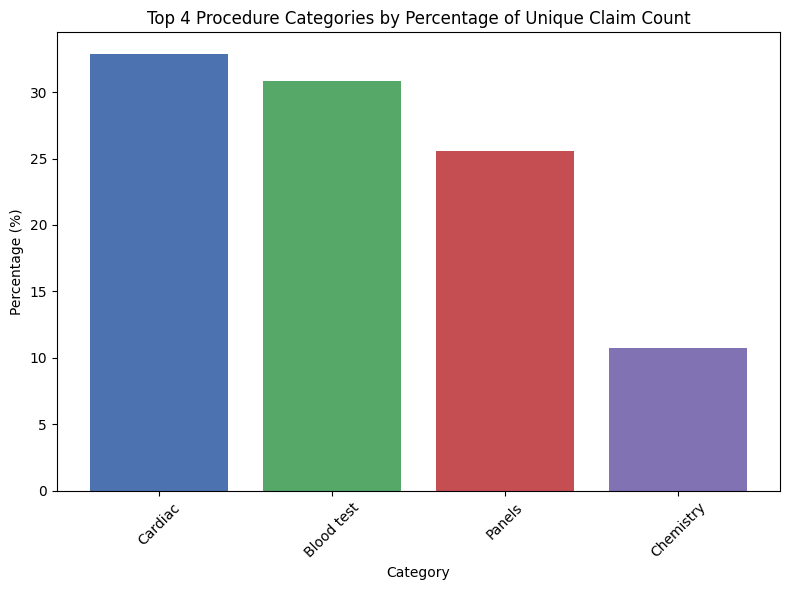

In [72]:
import matplotlib.pyplot as plt

# Data for the bar graph
data = {
    "Cardiac": 13540,
    "Blood test": 12710,
    "Panels": 10534,
    "Chemistry": 4423
}

# Calculate total and percentages
total = sum(data.values())
percentages = [(count / total) * 100 for count in data.values()]

# Plotting the bar graph with percentages
plt.figure(figsize=(8, 6))
plt.bar(data.keys(), percentages, color=['#4c72b0', '#55a868', '#c44e52', '#8172b3'])
plt.xlabel("Category")
plt.ylabel("Percentage (%)")
plt.title("Top 4 Procedure Categories by Percentage of Unique Claim Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("t4p.png", format="png")
plt.show()

In [73]:
# Merge the Medicare dataset with the Top 100 HCPCS/CPT codes dataset
medicare_with_category_df = pd.merge(medicare_df, hcpcs_code_100_df, on='hcpcs_code', how='left')

# Display the merged data to ensure the category column is correctly added
medicare_with_category_df.head(20)

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year,patient_age,description,category,cardiac_flag
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN,1936-04-20,F,2018,82,"Breast, Mammography",Mammography,0.0
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53,1954-10-09,F,2018,64,NaN,NaN,NaN
2,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79,1954-10-09,F,2018,64,NaN,NaN,NaN
3,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79,1954-10-09,F,2018,64,NaN,NaN,NaN
4,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79,1954-10-09,F,2018,64,NaN,NaN,NaN
5,100190,1228,1.972732e+09,2018-06-10,J2270,M1611,127.79,1954-10-09,F,2018,64,NaN,NaN,NaN
6,100190,1228,1.972732e+09,2018-06-10,99213,M1611,127.79,1954-10-09,F,2018,64,Established Patient Office or Other Outpatient...,Administrative,0.0
7,100227,12140,NaN,2018-10-24,J2785,NaN,NaN,1930-05-19,M,2018,88,NaN,NaN,NaN
8,100402,1261,1.285688e+09,2017-05-27,NaN,K5733,NaN,1934-06-19,F,2017,83,NaN,NaN,NaN
9,100402,1261,NaN,2017-06-02,NaN,R197,NaN,1934-06-19,F,2017,83,NaN,NaN,NaN


In [74]:
medicare_with_category_cleaned = medicare_with_category_df.dropna(subset=['cardiac_flag'])
medicare_with_category_cleaned
# print(medicare_with_category_cleaned.shape)

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year,patient_age,description,category,cardiac_flag
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN,1936-04-20,F,2018,82,"Breast, Mammography",Mammography,0.0
6,100190,1228,1.972732e+09,2018-06-10,99213,M1611,127.79,1954-10-09,F,2018,64,Established Patient Office or Other Outpatient...,Administrative,0.0
13,100698,11789,1.912991e+09,2017-07-28,G0463,M545,170.30,1957-07-06,F,2017,60,Hospital outpatient clinic visit for assessmen...,Administrative,0.0
15,100974,10042,NaN,2017-02-20,G0202,NaN,NaN,1950-07-11,F,2017,67,"Screening mammography, bilateral (2-view study...",Mammography,0.0
17,101001,11663,1.932133e+09,2016-11-08,71020,R918,98.85,1955-05-24,M,2016,61,DELETED,Others,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198545,999916,10651,1.194769e+09,2017-08-21,83036,E1169,0.00,1939-09-15,F,2017,78,Hemoglobin,Blood test,0.0
198547,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49,1947-01-28,F,2018,71,Established Patient Office or Other Outpatient...,Administrative,0.0
198549,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91,1947-01-28,F,2018,71,Administration of pneumococcal vaccine,Vaccine,0.0
198550,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19,1945-04-03,F,2016,71,Intraocular Lens Procedures,Ophthalmology,0.0


In [75]:
medicare_filtered = medicare_with_category_cleaned[
    medicare_with_category_cleaned['claim_year'].isin(['2016', '2017', '2018'])
]
medicare_filtered
#print(medicare_filtered.shape)

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year,patient_age,description,category,cardiac_flag
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN,1936-04-20,F,2018,82,"Breast, Mammography",Mammography,0.0
6,100190,1228,1.972732e+09,2018-06-10,99213,M1611,127.79,1954-10-09,F,2018,64,Established Patient Office or Other Outpatient...,Administrative,0.0
13,100698,11789,1.912991e+09,2017-07-28,G0463,M545,170.30,1957-07-06,F,2017,60,Hospital outpatient clinic visit for assessmen...,Administrative,0.0
15,100974,10042,NaN,2017-02-20,G0202,NaN,NaN,1950-07-11,F,2017,67,"Screening mammography, bilateral (2-view study...",Mammography,0.0
17,101001,11663,1.932133e+09,2016-11-08,71020,R918,98.85,1955-05-24,M,2016,61,DELETED,Others,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198545,999916,10651,1.194769e+09,2017-08-21,83036,E1169,0.00,1939-09-15,F,2017,78,Hemoglobin,Blood test,0.0
198547,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49,1947-01-28,F,2018,71,Established Patient Office or Other Outpatient...,Administrative,0.0
198549,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91,1947-01-28,F,2018,71,Administration of pneumococcal vaccine,Vaccine,0.0
198550,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19,1945-04-03,F,2016,71,Intraocular Lens Procedures,Ophthalmology,0.0


In [76]:
# Removing Adminstrative and Others
Medicare_finalized = medicare_filtered.query("category != 'Administrative' and category != 'Others'")
Medicare_finalized

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year,patient_age,description,category,cardiac_flag
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN,1936-04-20,F,2018,82,"Breast, Mammography",Mammography,0.0
15,100974,10042,NaN,2017-02-20,G0202,NaN,NaN,1950-07-11,F,2017,67,"Screening mammography, bilateral (2-view study...",Mammography,0.0
19,101147,13359,NaN,2017-09-02,80053,E785,NaN,1944-03-01,F,2017,73,Organ or Disease Oriented Panels,Panels,0.0
23,101368,10300,NaN,2017-09-09,80053,NaN,NaN,1984-10-01,M,2017,33,Organ or Disease Oriented Panels,Panels,0.0
25,101368,10300,NaN,2017-09-09,84484,NaN,NaN,1984-10-01,M,2017,33,Chemistry Procedures,Chemistry,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198543,999908,12056,1.932166e+09,2016-04-15,87077,R300,10.66,1943-12-25,M,2016,73,"Culture, bacterial",Pathology,0.0
198544,999908,12056,1.932166e+09,2016-04-15,87186,R300,11.65,1943-12-25,M,2016,73,"Susceptibility studies, antimicrobial agent",Pathology,0.0
198545,999916,10651,1.194769e+09,2017-08-21,83036,E1169,0.00,1939-09-15,F,2017,78,Hemoglobin,Blood test,0.0
198549,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91,1947-01-28,F,2018,71,Administration of pneumococcal vaccine,Vaccine,0.0


#### Data Quality Check 1: Counting number of missing values in npi_id

In [77]:
missing_values_count = Medicare_finalized['npi_id'].isna().sum()
print("Number of missing values in column:", missing_values_count)

Number of missing values in column: 15544


In [78]:
Medicare_Fin_df = Medicare_finalized.dropna(subset=['npi_id'])
Medicare_Fin_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year,patient_age,description,category,cardiac_flag
123,103458,11169,1.730134e+09,2016-10-29,77080,Z13820,198.47,1963-08-28,M,2016,53,"Dual-energy X-ray absorptiometry (DXA), bone d...",Radiology,0.0
135,103702,13214,1.508863e+09,2016-04-18,88305,D485,75.84,1940-02-29,F,2016,76,"Surgical pathology, gross and microscopic exam...",Pathology,0.0
165,104681,10174,1.114950e+09,2016-11-19,36415,J441,71.49,1954-04-13,M,2016,62,Venous Procedures,Cardiac,1.0
166,104681,10174,1.114950e+09,2016-11-19,80053,J441,71.49,1954-04-13,M,2016,62,Organ or Disease Oriented Panels,Panels,0.0
181,105030,12196,1.184737e+09,2016-09-26,80076,D472,61.21,1935-11-29,F,2016,81,Organ or Disease Oriented Panels,Panels,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198543,999908,12056,1.932166e+09,2016-04-15,87077,R300,10.66,1943-12-25,M,2016,73,"Culture, bacterial",Pathology,0.0
198544,999908,12056,1.932166e+09,2016-04-15,87186,R300,11.65,1943-12-25,M,2016,73,"Susceptibility studies, antimicrobial agent",Pathology,0.0
198545,999916,10651,1.194769e+09,2017-08-21,83036,E1169,0.00,1939-09-15,F,2017,78,Hemoglobin,Blood test,0.0
198549,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91,1947-01-28,F,2018,71,Administration of pneumococcal vaccine,Vaccine,0.0


In [79]:
Medicare_DF = Medicare_Fin_df.drop_duplicates(subset=['claim_id'])
Medicare_DF

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year,patient_age,description,category,cardiac_flag
123,103458,11169,1.730134e+09,2016-10-29,77080,Z13820,198.47,1963-08-28,M,2016,53,"Dual-energy X-ray absorptiometry (DXA), bone d...",Radiology,0.0
135,103702,13214,1.508863e+09,2016-04-18,88305,D485,75.84,1940-02-29,F,2016,76,"Surgical pathology, gross and microscopic exam...",Pathology,0.0
165,104681,10174,1.114950e+09,2016-11-19,36415,J441,71.49,1954-04-13,M,2016,62,Venous Procedures,Cardiac,1.0
181,105030,12196,1.184737e+09,2016-09-26,80076,D472,61.21,1935-11-29,F,2016,81,Organ or Disease Oriented Panels,Panels,0.0
186,105285,12052,1.497843e+09,2018-04-11,80053,R072,1704.67,1949-06-25,F,2018,69,Organ or Disease Oriented Panels,Panels,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198539,999905,10020,1.306839e+09,2017-06-13,G0202,Z1231,132.02,1947-06-15,F,2017,70,"Screening mammography, bilateral (2-view study...",Mammography,0.0
198542,999908,12056,1.932166e+09,2016-04-15,87186,R300,11.76,1943-12-25,M,2016,73,"Susceptibility studies, antimicrobial agent",Pathology,0.0
198545,999916,10651,1.194769e+09,2017-08-21,83036,E1169,0.00,1939-09-15,F,2017,78,Hemoglobin,Blood test,0.0
198549,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91,1947-01-28,F,2018,71,Administration of pneumococcal vaccine,Vaccine,0.0


#### Data Quality Check 2: If the value is true then the data is free of duplicates on claim_id

In [80]:
Medicare_DF_count = Medicare_DF.shape[0]
Medicare_DF_uniq_clm_id_df = Medicare_DF['claim_id'].drop_duplicates()

Medicare_DF_count ==Medicare_DF_uniq_clm_id_df.shape[0]

True

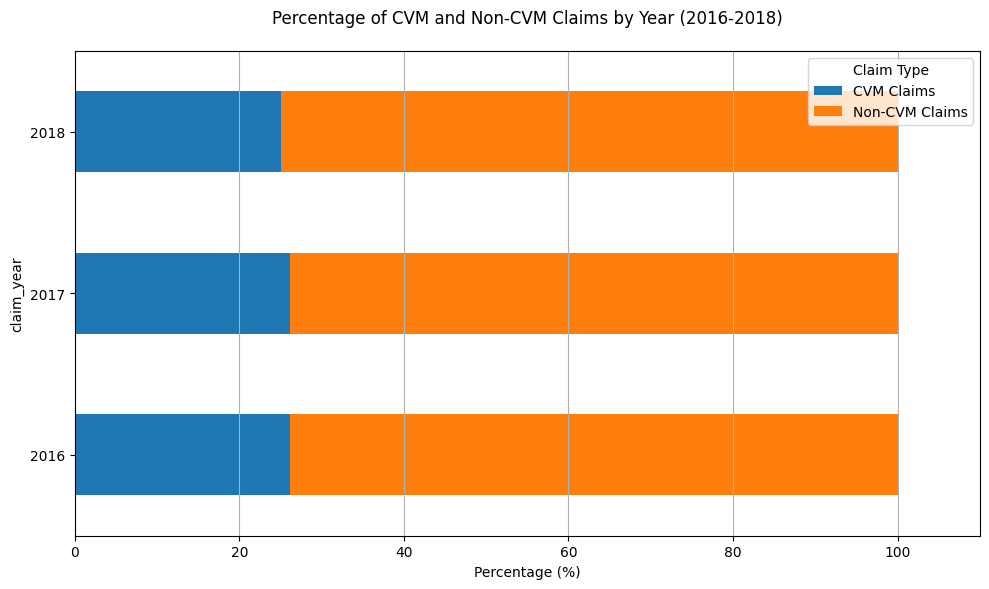

In [81]:
import matplotlib.pyplot as plt

# Assuming Medicare_finalized is  DataFrame with claim data
claims_summary = Medicare_DF.groupby('claim_year').agg(
    cvm_claims=('cardiac_flag', lambda x: (x == 1.0).sum()),  # Count CVM claims
    non_cvm_claims=('cardiac_flag', lambda x: (x == 0).sum())  # Count non-CVM claims
).reset_index()

# Calculate total claims and percentages
claims_summary['total_claims'] = claims_summary['cvm_claims'] + claims_summary['non_cvm_claims']
claims_summary['cvm_percentage'] = claims_summary['cvm_claims'] / claims_summary['total_claims'] * 100
claims_summary['non_cvm_percentage'] = claims_summary['non_cvm_claims'] / claims_summary['total_claims'] * 100

# Plotting the horizontal 100% stacked bar graph
ax = claims_summary[['claim_year', 'cvm_percentage', 'non_cvm_percentage']].set_index('claim_year').plot(
    kind='barh', stacked=True, figsize=(10, 6)
)

# Set x-axis to percentage
ax.set_xlabel('Percentage (%)')
ax.set_title('Percentage of CVM and Non-CVM Claims by Year (2016-2018)', pad=20)  # Increase title padding
ax.set_xlim(0, 110)  # Add space on the right side of the bars

# Add a grid for better readability
ax.xaxis.grid(True)

# Display the legend
ax.legend(title='Claim Type', labels=['CVM Claims', 'Non-CVM Claims'], loc='best')

# Show the plot
plt.tight_layout()
plt.savefig("ax.png", format="png")
plt.show()

In [82]:
print(Medicare_Fin_df.head())  # Check the first few rows of your DataFrame
print(Medicare_Fin_df['claim_year'].unique())  # Check unique years
print(Medicare_Fin_df['cardiac_flag'].value_counts())  # Count unique values in 'cardiac_flag'
print(claims_summary)

     claim_id  patient_id        npi_id  claim_date hcpcs_code diagnosis_code  \
123    103458       11169  1.730134e+09  2016-10-29      77080         Z13820   
135    103702       13214  1.508863e+09  2016-04-18      88305           D485   
165    104681       10174  1.114950e+09  2016-11-19      36415           J441   
166    104681       10174  1.114950e+09  2016-11-19      80053           J441   
181    105030       12196  1.184737e+09  2016-09-26      80076           D472   

     claim_cost patient_birth_date patient_gender claim_year  patient_age  \
123      198.47         1963-08-28              M       2016           53   
135       75.84         1940-02-29              F       2016           76   
165       71.49         1954-04-13              M       2016           62   
166       71.49         1954-04-13              M       2016           62   
181       61.21         1935-11-29              F       2016           81   

                                           descrip

In [83]:
# Filter for CVM (Cardiac) claims
cvm_claims_df = Medicare_DF[Medicare_DF['cardiac_flag'] == 1]
cvm_claims_df

# Group by HCP NPI ID and count the number of CVM claims per HCP
hcp_claims_count_df = cvm_claims_df.groupby('npi_id').agg(
    num_cvm_claims=('claim_id', 'count')
).reset_index()

# Display the resulting DataFrame to ensure it worked
print(hcp_claims_count_df.head())

         npi_id  num_cvm_claims
0  1.003014e+09               1
1  1.003031e+09               1
2  1.003058e+09               1
3  1.003067e+09               1
4  1.003099e+09               1


In [84]:
# Define segmentation based on the number of CVM claims
def segment_hcp(claim_count):
    if claim_count == 1:
        return 'Disease Aware'
    elif 2 <= claim_count <= 4:
        return 'Trialists'
    elif 5 <= claim_count <= 9:
        return 'Rising Stars'
    else:
        return 'High-Volume Prescribers'

# Apply segmentation to the HCP claim count data
hcp_claims_count_df['segment'] = hcp_claims_count_df['num_cvm_claims'].apply(segment_hcp)

# Display the segmented HCP DataFrame
print(hcp_claims_count_df.head())

         npi_id  num_cvm_claims        segment
0  1.003014e+09               1  Disease Aware
1  1.003031e+09               1  Disease Aware
2  1.003058e+09               1  Disease Aware
3  1.003067e+09               1  Disease Aware
4  1.003099e+09               1  Disease Aware


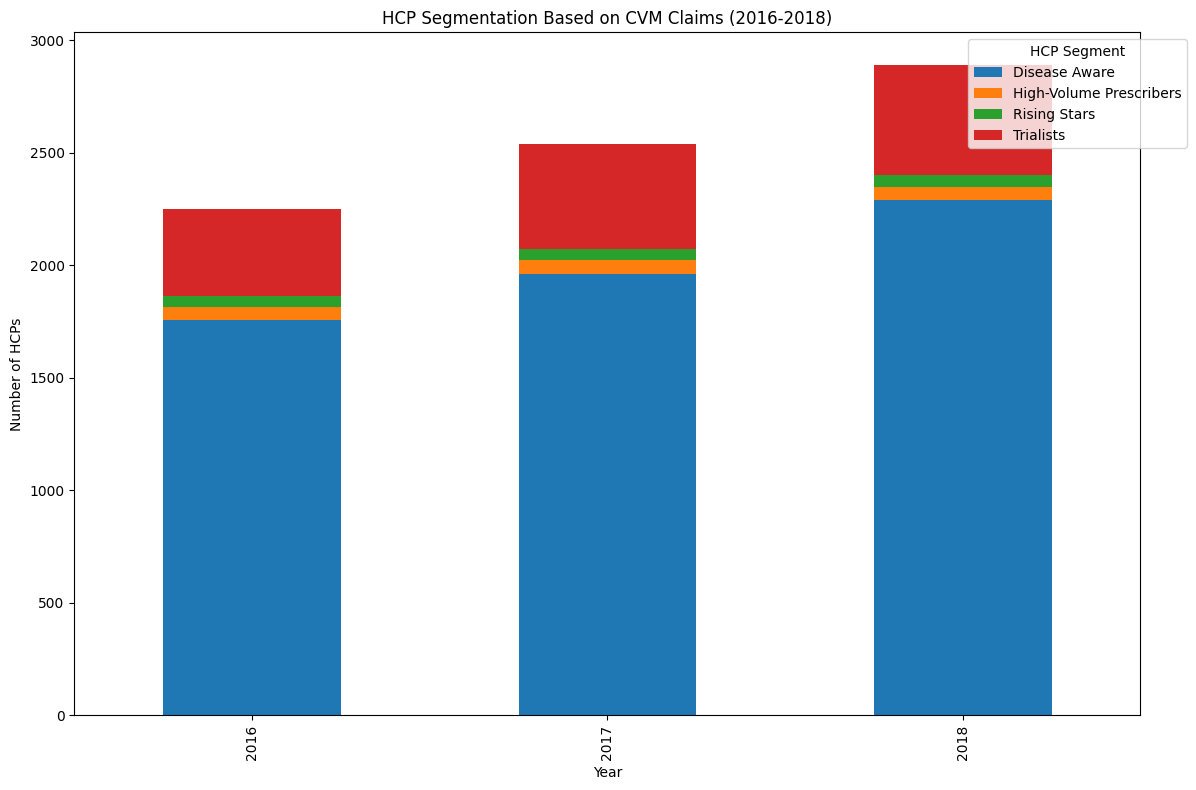

In [85]:
# Merge with original CVM claims data to get claim_year
hcp_claims_with_year_df = pd.merge(hcp_claims_count_df, cvm_claims_df[['npi_id', 'claim_year']], on='npi_id', how='left').drop_duplicates()

# Group by claim year and segment to count the number of HCPs in each segment
hcp_segment_per_year_df = hcp_claims_with_year_df.groupby(['claim_year', 'segment']).agg(
    num_hcps=('npi_id', 'nunique')
).reset_index()

# Reshape the data for a stacked bar plot
hcp_segment_per_year_pivot = hcp_segment_per_year_df.pivot(index='claim_year', columns='segment', values='num_hcps').fillna(0)

# Plotting the stacked bar chart
hcp_segment_per_year_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.title('HCP Segmentation Based on CVM Claims (2016-2018)')
plt.xlabel('Year')
plt.ylabel('Number of HCPs')
plt.legend(title='HCP Segment', bbox_to_anchor=(1.05, 1), loc='upper right')

# Show the plot
plt.tight_layout()
plt.savefig("hcp.png", format="png")
plt.show()

In [86]:
#Convert claim_date and patient_birth_date to datetime
import pandas as pd
Medicare_DF['claim_date'] = pd.to_datetime(Medicare_DF['claim_date'])
Medicare_DF['patient_birth_date'] = pd.to_datetime(Medicare_DF['patient_birth_date'])

# Extract the year from claim_date and patient_birth_date
Medicare_DF['claim_year'] = Medicare_DF['claim_date'].dt.year
Medicare_DF['birth_year'] = Medicare_DF['patient_birth_date'].dt.year

# Calculate patient age at the time of the claim
Medicare_DF['patient_age'] = Medicare_DF['claim_year'] - Medicare_DF['birth_year']

# Display the first few rows to verify the calculation
print(Medicare_DF[['claim_year', 'patient_birth_date', 'patient_age']].head())

     claim_year patient_birth_date  patient_age
123        2016         1963-08-28           53
135        2016         1940-02-29           76
165        2016         1954-04-13           62
181        2016         1935-11-29           81
186        2018         1949-06-25           69


C:\Users\javer\AppData\Local\Temp\ipykernel_19948\3717792359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Medicare_DF['claim_date'] = pd.to_datetime(Medicare_DF['claim_date'])
C:\Users\javer\AppData\Local\Temp\ipykernel_19948\3717792359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Medicare_DF['patient_birth_date'] = pd.to_datetime(Medicare_DF['patient_birth_date'])
C:\Users\javer\AppData\Local\Temp\ipykernel_19948\3717792359.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [87]:
# Define the age segmentation based on the patient's age
def age_segment(age):
    if 18 <= age <= 59:
        return '18-59'
    elif 60 <= age <= 69:
        return '60-69'
    elif 70 <= age <= 79:
        return '70-79'
    elif age >= 80:
        return '80+'
    else:
        return 'Unknown'

# Apply the age segmentation function
Medicare_DF['age_segment'] = Medicare_DF['patient_age'].apply(age_segment)

# Display the first few rows to verify the segmentation
print(Medicare_DF[['patient_age', 'age_segment']].head())

     patient_age age_segment
123           53       18-59
135           76       70-79
165           62       60-69
181           81         80+
186           69       60-69


C:\Users\javer\AppData\Local\Temp\ipykernel_19948\3773586839.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Medicare_DF['age_segment'] = Medicare_DF['patient_age'].apply(age_segment)


In [88]:
# Filter for CVM (Cardiac) claims
cvm_claims_df = Medicare_DF[Medicare_DF['cardiac_flag'] == 1]

# Group by year and age segment to count the number of claims
age_segment_claims_df = cvm_claims_df.groupby(['claim_year', 'age_segment']).agg(
    num_claims=('claim_id', 'count')
).reset_index()

# Display the results
print(age_segment_claims_df.head())

age_segment_per_year_pivot = age_segment_claims_df.pivot(index='claim_year', columns='age_segment', values='num_claims').fillna(0)

   claim_year age_segment  num_claims
0        2016       18-59         261
1        2016       60-69        1000
2        2016       70-79         815
3        2016         80+         773
4        2017       18-59         287


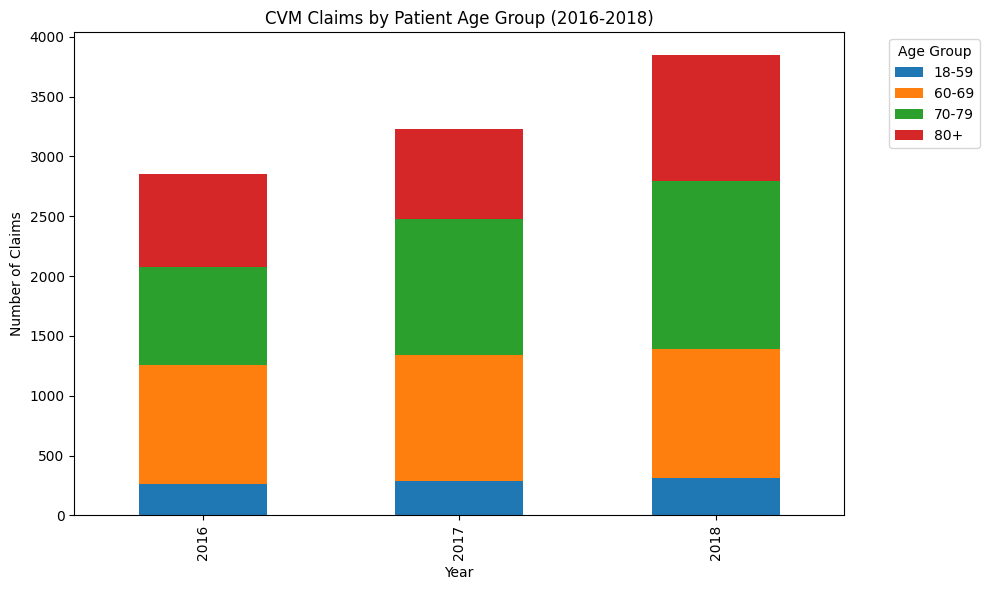

Year-over-Year Change Percentage in Claim Volume for Each Segment:
age_segment      18-59      60-69      70-79        80+
claim_year                                             
2016          0.000000   0.000000   0.000000   0.000000
2017         13.184584  12.322792  25.954198  -0.632022
2018         16.935484   5.461165  33.193473  39.929329


In [89]:
# Plot the stacked bar chart
age_segment_per_year_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.title('CVM Claims by Patient Age Group (2016-2018)')
plt.xlabel('Year')
plt.ylabel('Number of Claims')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig("page.png", format="png")
plt.show()

claim_counts = Medicare_DF.groupby(['claim_year', 'age_segment']).size().unstack(fill_value=0)

claim_counts_pct_change = claim_counts.pct_change().fillna(0) * 100

# Step 6: Display Year-over-Year Change Table
print("Year-over-Year Change Percentage in Claim Volume for Each Segment:")
print(claim_counts_pct_change)

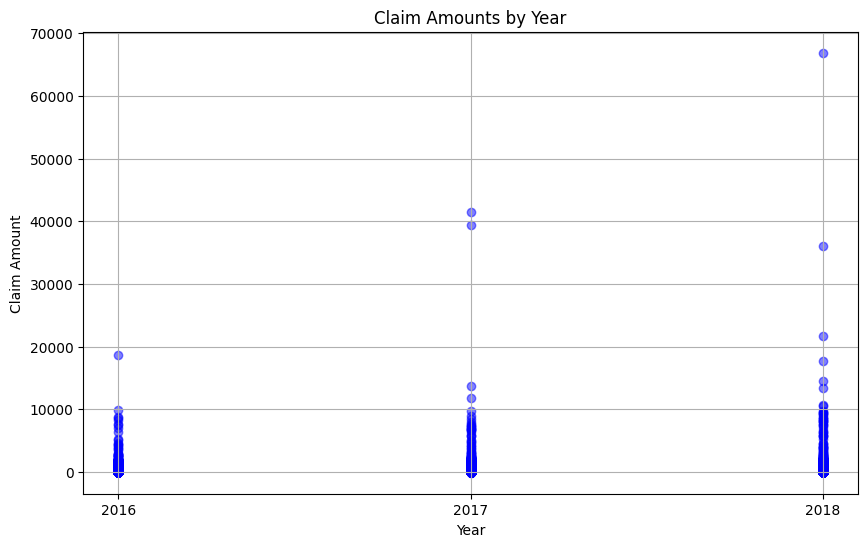

In [90]:
# Create scatter plot without aggregation
plt.figure(figsize=(10, 6))
plt.scatter(Medicare_DF['claim_year'], Medicare_DF['claim_cost'], color='blue', alpha=0.5)  # alpha for transparency
plt.title('Claim Amounts by Year')
plt.xlabel('Year')
plt.ylabel('Claim Amount')
plt.grid()
plt.xticks(sorted(Medicare_DF['claim_year'].unique()))  # Show unique years on the x-axis
plt.savefig("Splot.png", format="png")
plt.show()

## Q1. Based on the trends for the share of CVM claims as a percentage of total claims over the years 2016 through 2018, what are some business insights you can gather? What are some additional analyses you could do based on these trends? 

In [91]:
# Done in the pdf document.

## Q2. Evaluate the HCP behavior in context of claim volume from 2016-2018. How many HCPs are submitting 1 CVM claim; how many HCPs are associated with more than 10 claims, etc.? Once you perform this analysis, explain how this trend can influence the sales force deployment. That is, how would you segment the HCPs and how would you allocate In-Person (sales force) vs Non-Personal Promotions (NPP, i.e. Emails, Social Media, Digital etc.) efforts?

In [92]:
# Done in the pdf document.

## Q3. Evaluate the Patient Age demographics in the context of claim volume from 2016-2018. Bucket the patients into groups based on their age and explain the trends. How would you position the Marketing Budgets and the Promotions with respect to the changing landscape of the CVM claims and the respective patient segments? 

In [93]:
# Done in the pdf document.